### Problem Statement
- Company X Education needs assistance in identifying which of the leads received are most likely to convert and catgorized as 'Hot Leads'. <br>
- It is observed that only about 30% of the leads actually get converted to actual customers.<br>


#### Requirement
- Build a logistic regression model which will help determine the most promising leads assigning a lead score to every lead.
- Assign lead scores to each lead from 0 to 100.
- Expected conversion rate using model to be around 80%.


**Steps to be performed**
- Reading and understanding data
- Data Preparation
    1. Variable treatment
    2. Missing Value imputation
    3. Dummy variable creation
    4. Outlier Treatment
    5. Bivariate and Multivariate analysis
- Test/Train Split
- Feature Scaling
- Model Building
- Feature selection using RFE and p-value/VIF combination.
- Determining model Accuracy, other metrics using confusion matrix and ROC Curve
- Optimal threshold determination using Sensitivity/Specificity and Precision/Recall curve. Rebuild model as per optimal threshold.
- Decide whether to go for precision/recall or sensitivity/specificity as per metrics observed.
- Running model on test data. Determine accuracy and other metrics.
- Adding Lead Scores to leads.

### Step 1: Reading and Understanding the Data

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split #For splitting dataset
from sklearn.preprocessing import StandardScaler #For scaling data

import statsmodels.api as sm #For Model building
from sklearn.linear_model import LogisticRegression #For Model building 
from sklearn.feature_selection import RFE #Feature Selection
from statsmodels.stats.outliers_influence import variance_inflation_factor #To calculate VIF for determining multicollinearity

from sklearn import metrics #For model evaluation
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score, recall_score #For precision and recall values
from sklearn.metrics import precision_recall_curve #For plotting precision_recall_curve

In [3]:
leads = pd.read_csv("Leads.csv",index_col='Lead Number')
leads.head()


,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
660728,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
660727,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
660719,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
660681,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 36)

In [5]:
leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                

In [7]:
# function to find the % of null values in a column. This is shown in the descending order.

def findnull(df):
    totalnull = df.isnull().sum().sort_values(ascending = False)
    percentnull = (df.isnull().sum()/len(df.index)*100).sort_values(ascending = False)
    nullinfo = pd.concat([totalnull,percentnull],axis=1)
    colnames = ['Total','%']
    nullinfo.columns = colnames
    return nullinfo


findnull(leads)

,Total,%
Lead Quality,4767,51.590909
Asymmetrique Profile Score,4218,45.649351
Asymmetrique Activity Score,4218,45.649351
Asymmetrique Profile Index,4218,45.649351
Asymmetrique Activity Index,4218,45.649351
Tags,3353,36.287879
Lead Profile,2709,29.318182
What matters most to you in choosing a course,2709,29.318182
What is your current occupation,2690,29.112554
Country,2461,26.634199


### Step 2: Data Visualization and Preparation

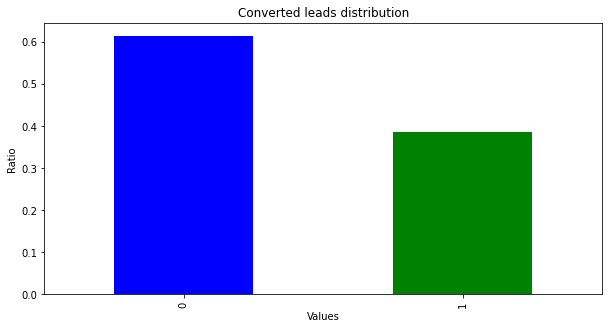

In [8]:
leads.Converted.value_counts(normalize=True).plot.bar(figsize=[10,5],color=['b','g'])
plt.title("Converted leads distribution")
plt.ylabel('Ratio')
plt.xlabel('Values')
plt.show()

**As indicated, only about a third of the leads get converted.**

In [9]:
def func_plotcatbar(field,dataset=leads):
    print(field)
    a = dataset[field].value_counts(normalize=True)*100
    print(a)
    aDict = dict(leads[field].value_counts(normalize=True)*100)
    print(aDict.keys())
    plt.figure(figsize=(20,8))
    sns.barplot(x=a.index,y=a)
    plt.xticks(rotation=45)
    plt.title('Value Distribution of '+field)
    plt.show()

#### Finding if same values for all leads

In [10]:
leads['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [11]:
leads['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [12]:
leads['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [13]:
leads['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [14]:
leads['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

**For 'Update me on Supply Chain Content','Get updates on DM Content', 'I agree to pay the amount through cheque', 
'Magazine', 'Receive More Updates About Our Courses', all leads have same value. Hence, using these fields will not impact the final model.**

#### Finding variables with value = 'Select'

In [15]:
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [16]:
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [17]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [18]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### Converting Select to NaN

In [19]:
leads.Specialization.head(10)

Lead Number
660737                     Select
660728                     Select
660727    Business Administration
660719      Media and Advertising
660681                     Select
660680                        NaN
660673    Supply Chain Management
660664                        NaN
660624     IT Projects Management
660616         Finance Management
Name: Specialization, dtype: object

In [20]:
cols=['City','Lead Profile','How did you hear about X Education','Specialization']
for col in cols:
    leads[col] = leads[col].replace('Select',np.nan)
leads.Specialization.head(10)

Lead Number
660737                        NaN
660728                        NaN
660727    Business Administration
660719      Media and Advertising
660681                        NaN
660680                        NaN
660673    Supply Chain Management
660664                        NaN
660624     IT Projects Management
660616         Finance Management
Name: Specialization, dtype: object

In [21]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
NC_EDM                  1
welearnblog_Home        1
WeLearn                 1
blog                    1
testone                 1
youtubechannel          1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

**As is observed, value Google is displayed once as Google and once as google. Hence, combining the two.**

In [22]:
leads['Lead Source'].replace('google','Google')

Lead Number
660737        Olark Chat
660728    Organic Search
660727    Direct Traffic
660719    Direct Traffic
660681            Google
               ...      
579564    Direct Traffic
579546    Direct Traffic
579545    Direct Traffic
579538            Google
579533    Direct Traffic
Name: Lead Source, Length: 9240, dtype: object

In [23]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
NC_EDM                  1
welearnblog_Home        1
WeLearn                 1
blog                    1
testone                 1
youtubechannel          1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [24]:
findnull(leads)

,Total,%
How did you hear about X Education,7250,78.463203
Lead Profile,6855,74.188312
Lead Quality,4767,51.590909
Asymmetrique Profile Score,4218,45.649351
Asymmetrique Activity Score,4218,45.649351
Asymmetrique Profile Index,4218,45.649351
Asymmetrique Activity Index,4218,45.649351
City,3669,39.707792
Specialization,3380,36.580087
Tags,3353,36.287879


Dropping columns with null values more than 50%

In [25]:
leads.drop(['How did you hear about X Education','Lead Profile','Lead Quality'],axis=1,inplace=True)

In [26]:
leads.shape

(9240, 33)

Dropping columns where all values are 'No'

In [27]:
leads.drop(['Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
           'Magazine','Receive More Updates About Our Courses'],axis=1,inplace=True)


In [28]:
leads.shape

(9240, 28)

Dropping 'Prospect ID' column since that is a unique column similar to 'Lead Number' which is used as index

In [29]:
leads.drop('Prospect ID',axis=1,inplace=True)

In [30]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [31]:
leads.shape

(9240, 27)

In [32]:
cat_cols = list(leads.select_dtypes(include=['object']).columns)
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [33]:
len(cat_cols)

21

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
dict_keys(['Landing Page Submission', 'API', 'Lead Add Form', 'Lead Import', 'Quick Add Form'])


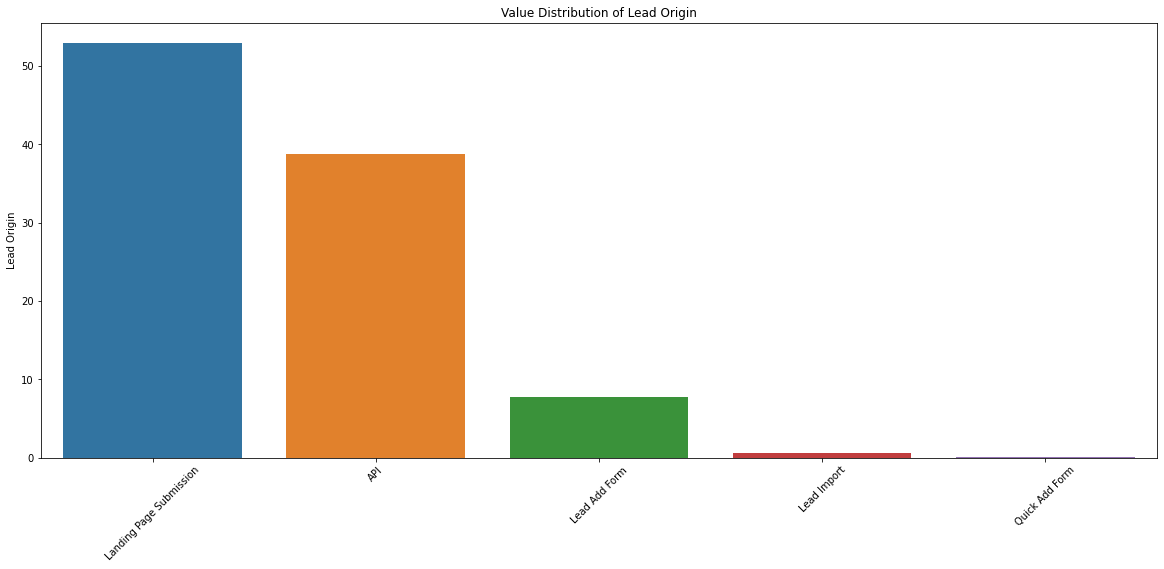

Lead Source
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
NC_EDM                0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
testone               0.010865
youtubechannel        0.010865
Pay per Click Ads     0.010865
Name: Lead Source, dtype: float64
dict_keys(['Google', 'Direct Traffic', 'Olark Chat', 'Organic Search', 'Reference', 'Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'google', 'Click2call', 'Press_Release', 'Social Media', 'Live Chat', 'NC_EDM', 'welearnblog_Home', 'WeLearn', 'blog', 'testone', 'youtubechannel', 'Pay per Clic

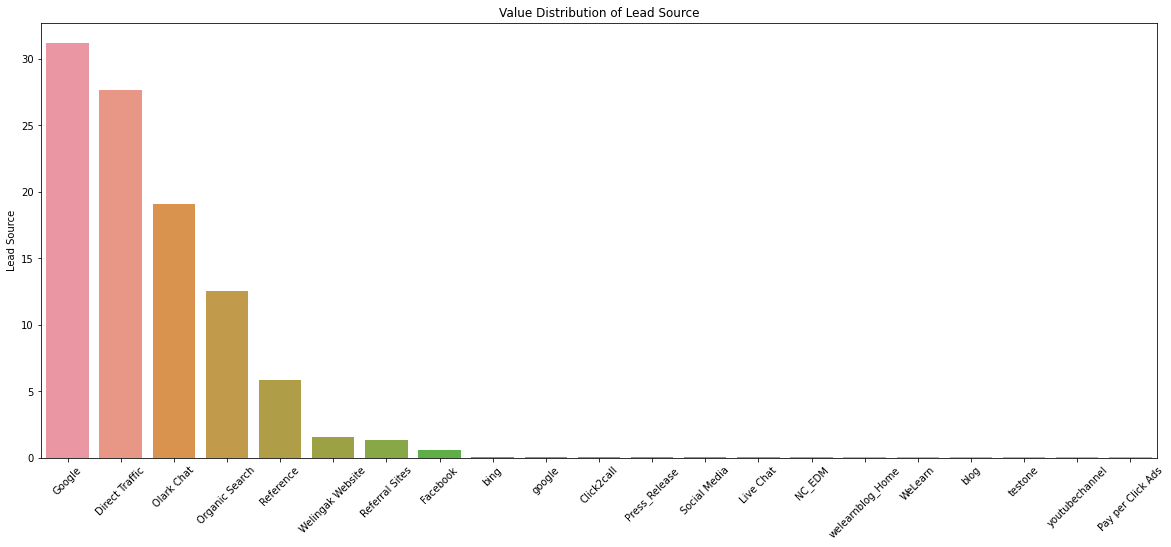

Do Not Email
No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64
dict_keys(['No', 'Yes'])


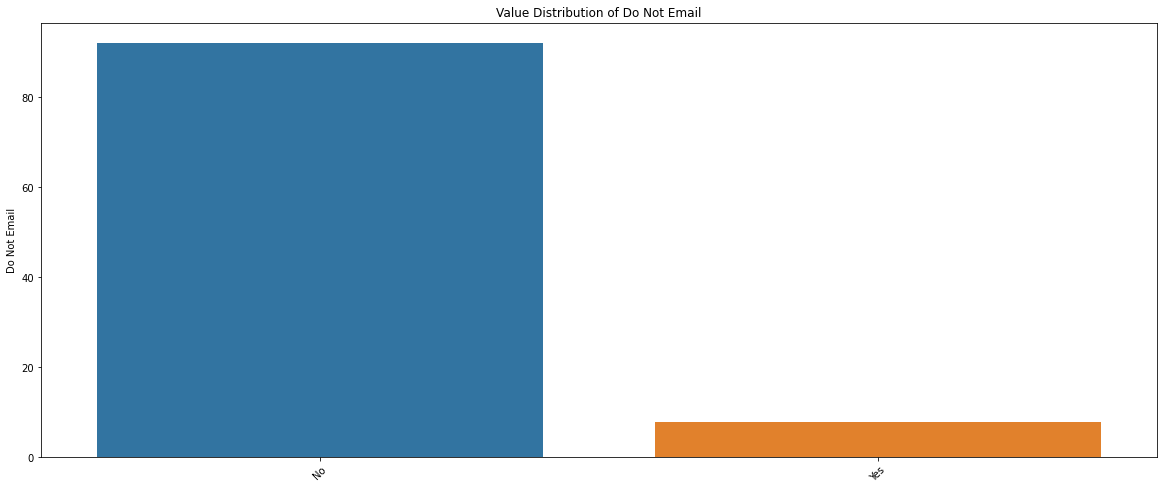

Do Not Call
No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64
dict_keys(['No', 'Yes'])


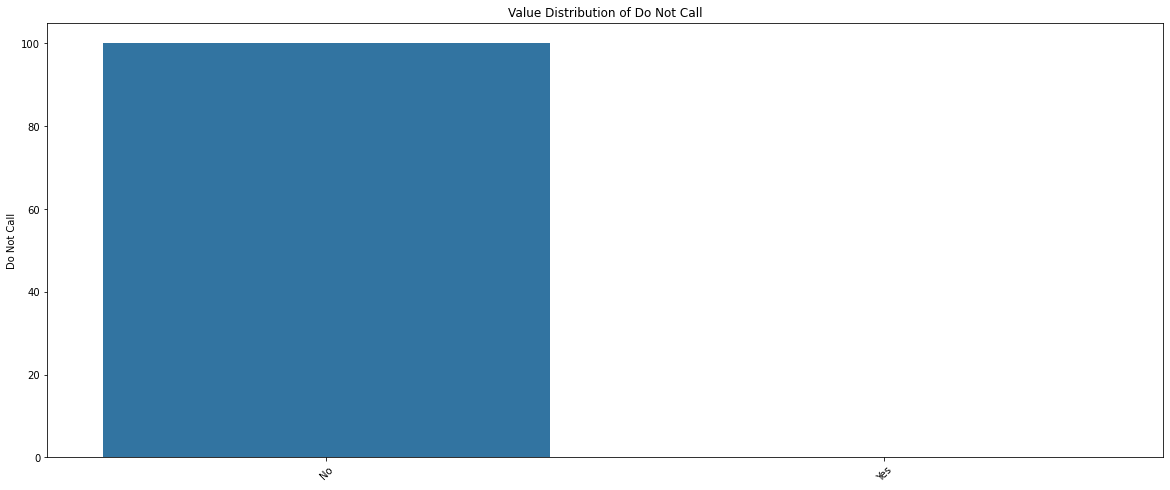

Last Activity
Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Resubscribed to emails           0.010945
Visited Booth in Tradeshow       0.010945
Name: Last Activity, dtype: float64
dict_keys(['Email Opened', 'SMS Sent', 'Olark Chat Conversation', 'Page Visited on Website', 'Converted to Lead', 'Email Bounced', 'Email Link Clicked', 'Form Submitted on Website', 'Unreachable', 'Unsubscribed', 'Had a Phone Conversati

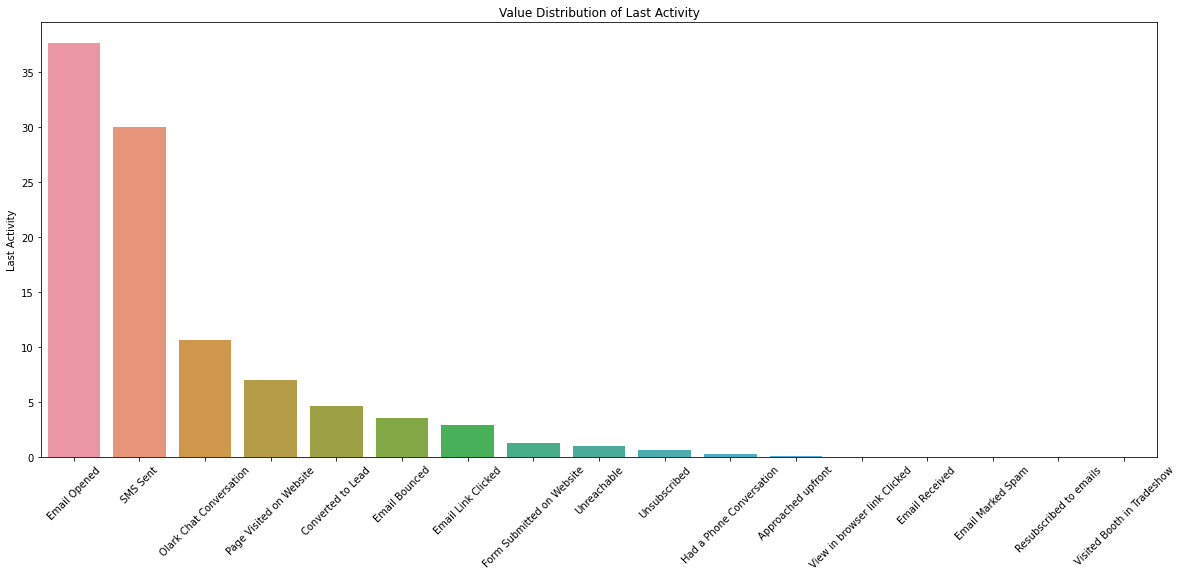

Country
India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Bahrain                  0.103260
Hong Kong                0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Canada                   0.059006
Germany                  0.059006
Nigeria                  0.059006
Kuwait                   0.059006
Sweden                   0.044254
Bangladesh               0.029503
Philippines              0.029503
Belgium                  0.029503
Netherlands              0.029503
Asia/Pacific Region      0.029503
Ghana                    0.029503
Uganda                   0.029503
China                    0.029503
Italy                    0.029503
Vietnam                  0.014751
Malays

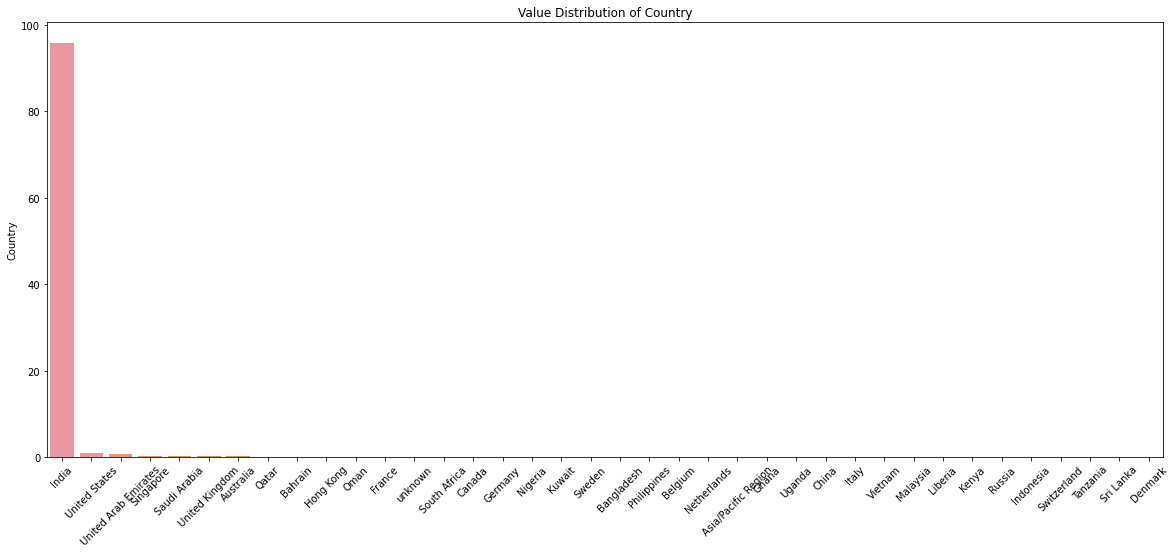

Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Media and Advertising                 3.464164
Travel and Tourism                    3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64
dict_keys(['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Mana

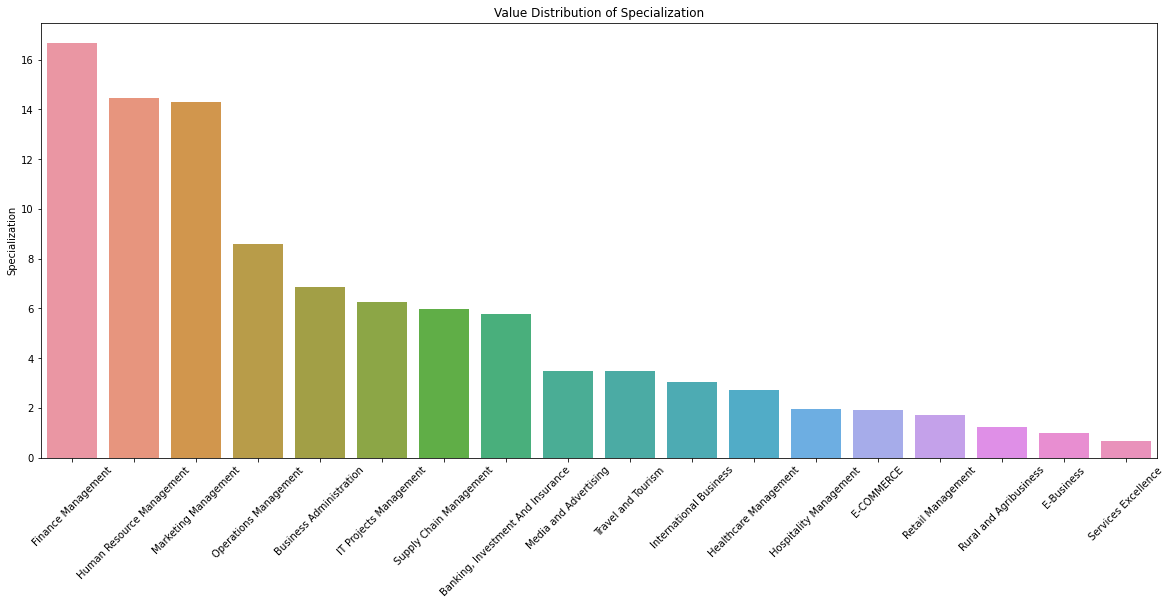

What is your current occupation
Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64
dict_keys(['Unemployed', 'Working Professional', 'Student', 'Other', 'Housewife', 'Businessman'])


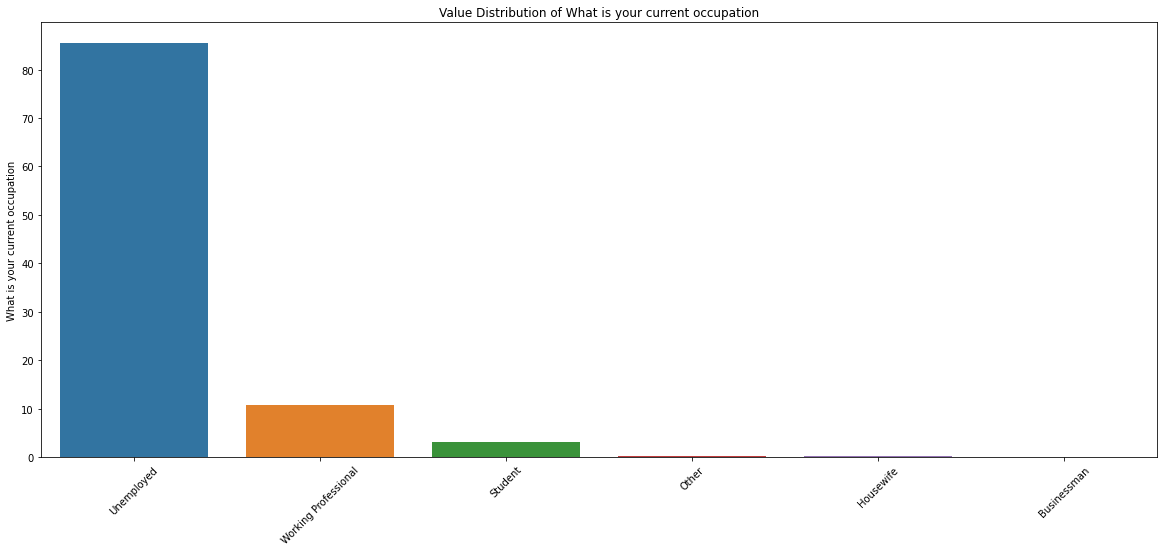

What matters most to you in choosing a course
Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64
dict_keys(['Better Career Prospects', 'Flexibility & Convenience', 'Other'])


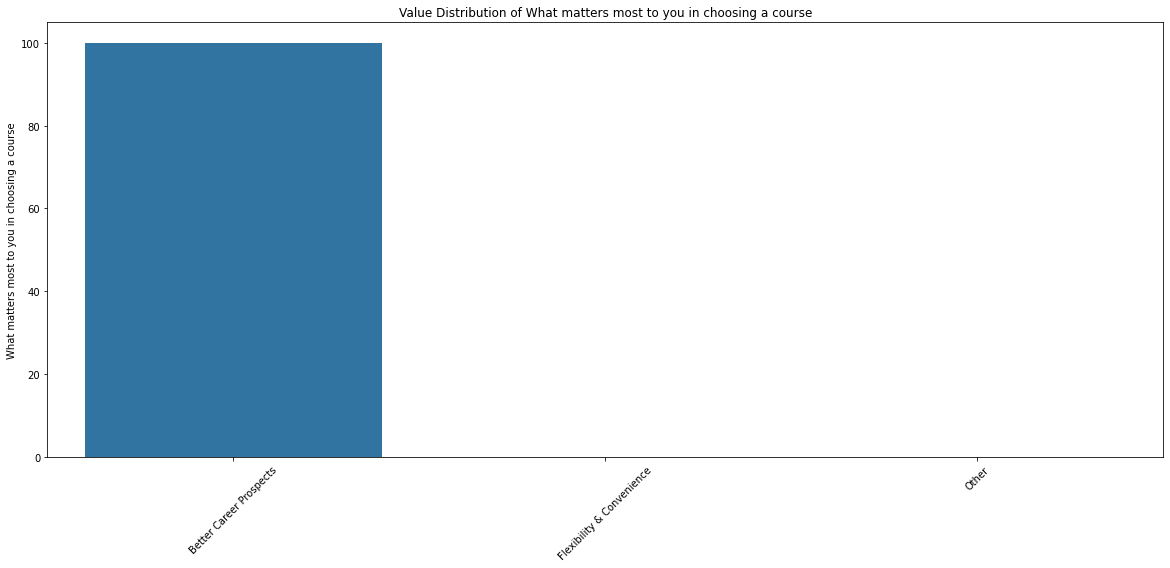

Search
No     99.848485
Yes     0.151515
Name: Search, dtype: float64
dict_keys(['No', 'Yes'])


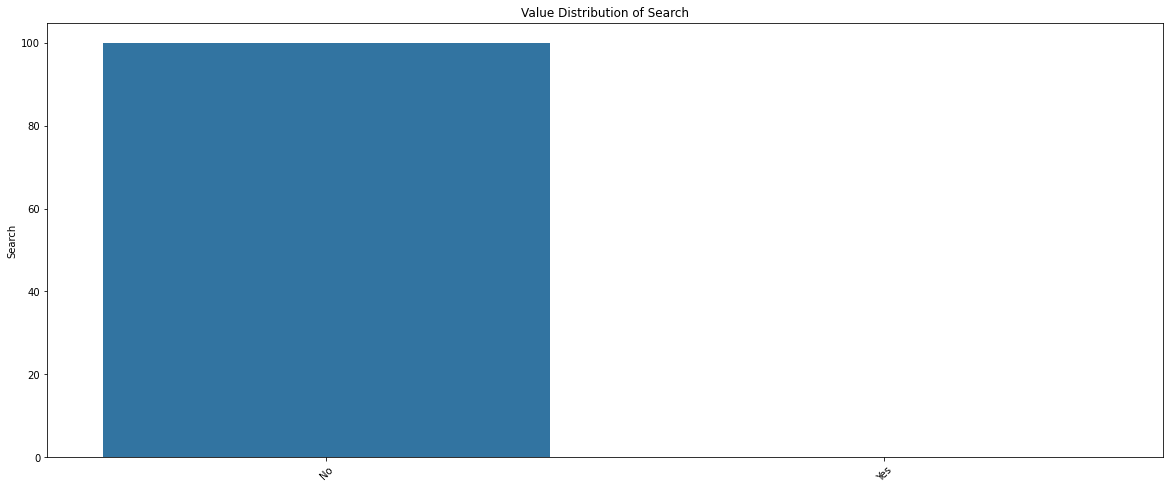

Newspaper Article
No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64
dict_keys(['No', 'Yes'])


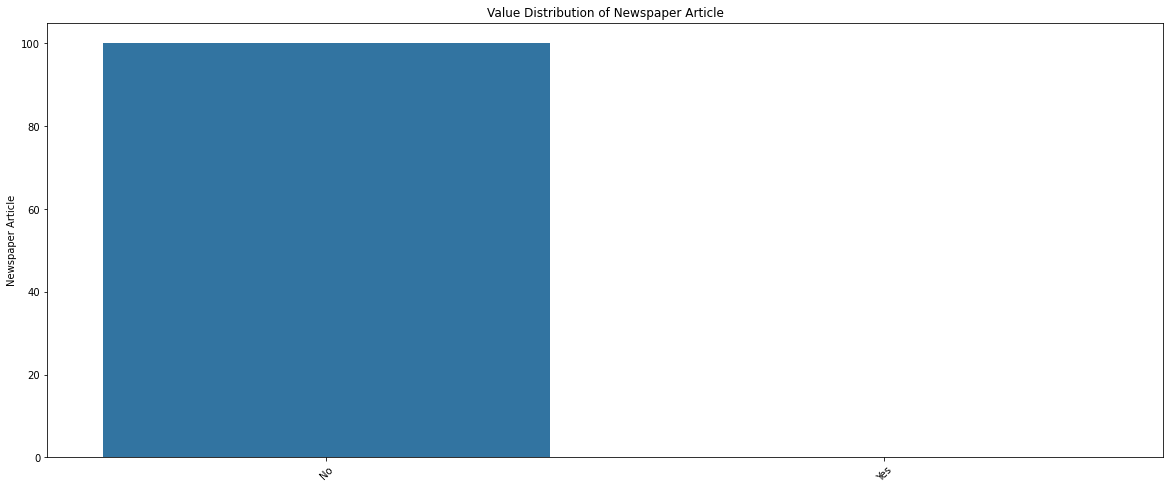

X Education Forums
No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64
dict_keys(['No', 'Yes'])


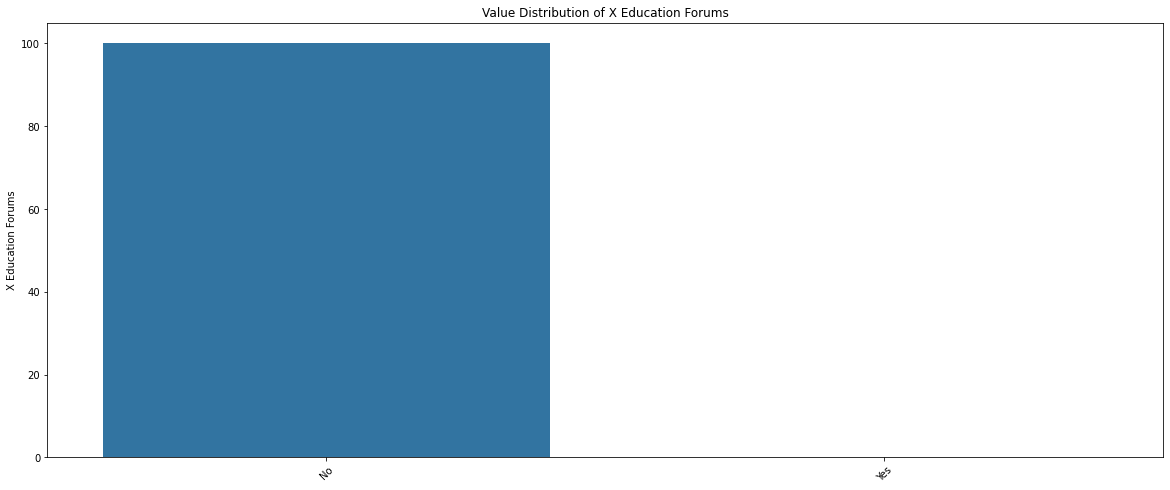

Newspaper
No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64
dict_keys(['No', 'Yes'])


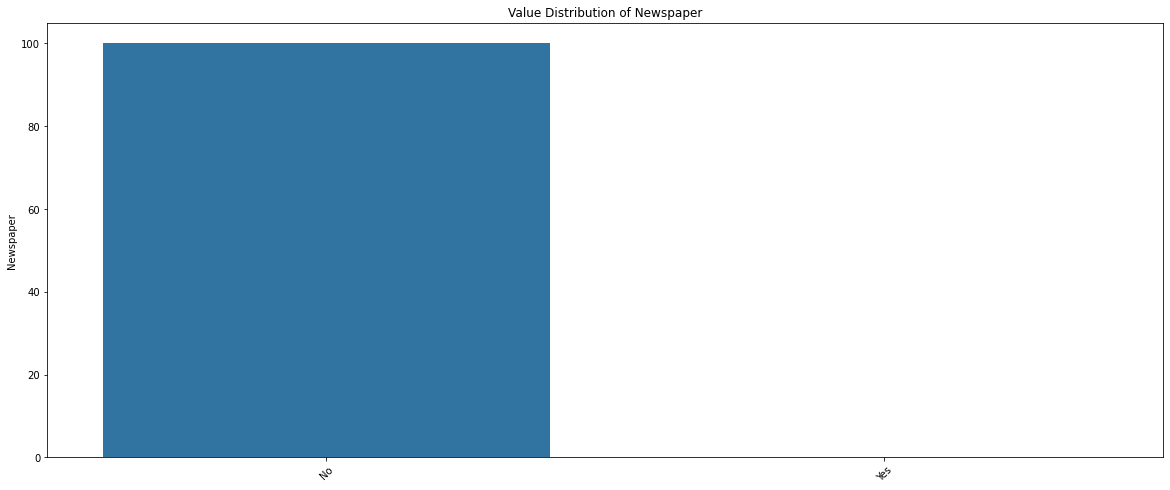

Digital Advertisement
No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64
dict_keys(['No', 'Yes'])


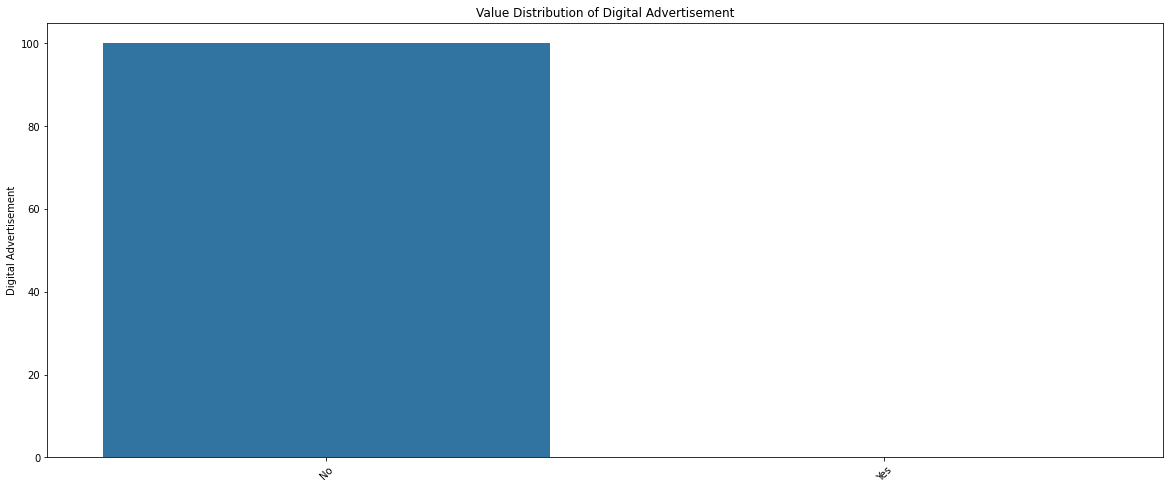

Through Recommendations
No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64
dict_keys(['No', 'Yes'])


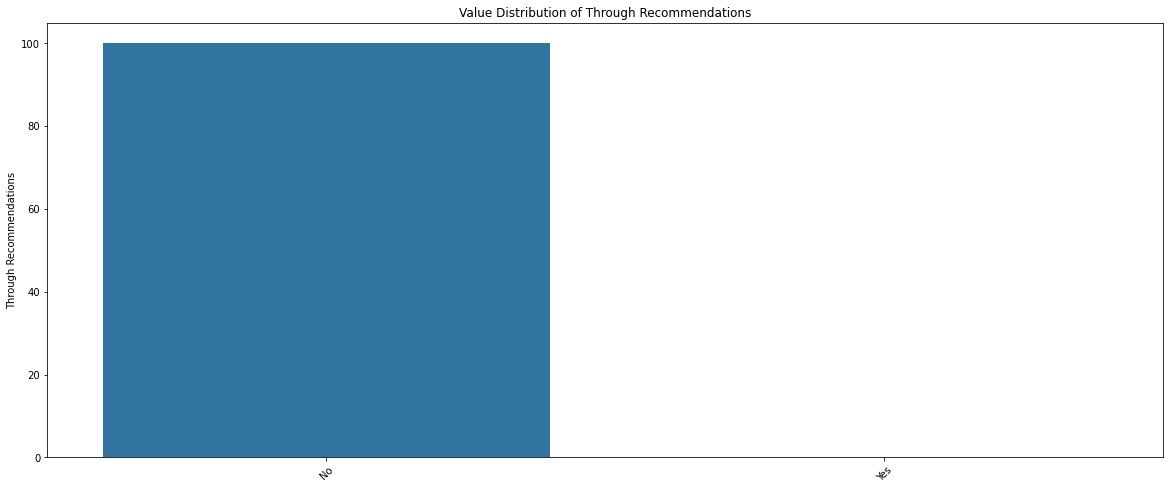

Tags
Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                               

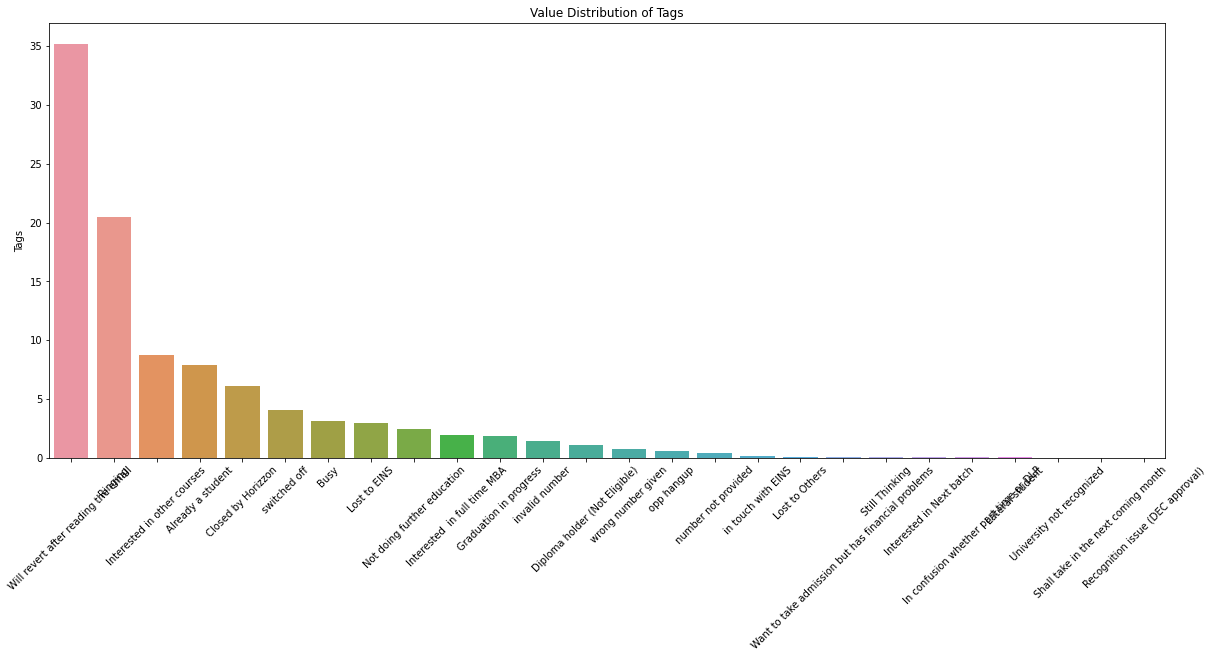

City
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64
dict_keys(['Mumbai', 'Thane & Outskirts', 'Other Cities', 'Other Cities of Maharashtra', 'Other Metro Cities', 'Tier II Cities'])


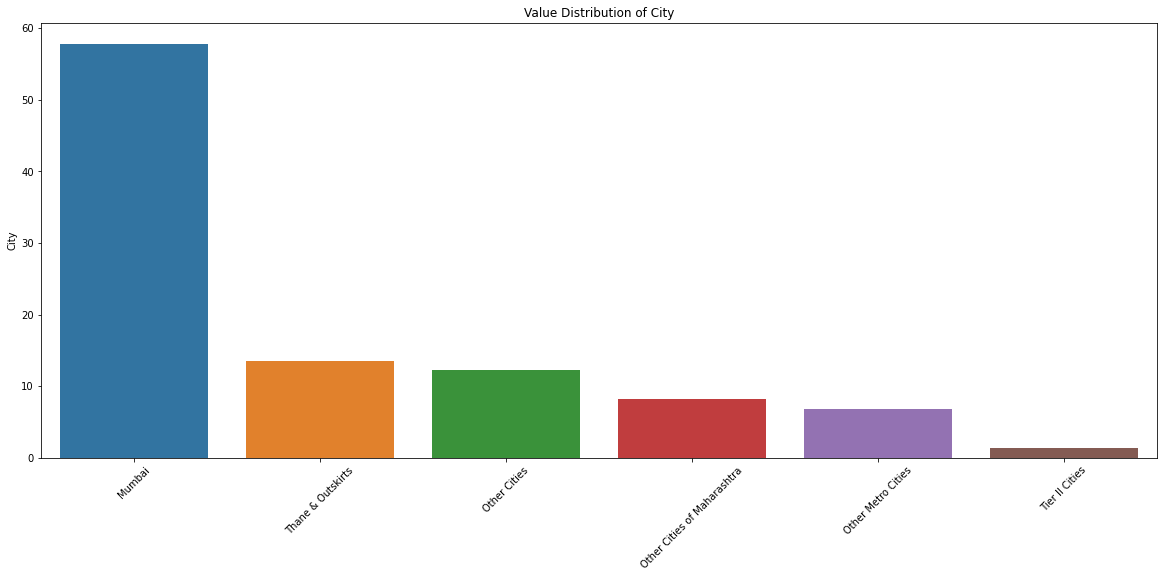

Asymmetrique Activity Index
02.Medium    76.443648
01.High      16.348068
03.Low        7.208284
Name: Asymmetrique Activity Index, dtype: float64
dict_keys(['02.Medium', '01.High', '03.Low'])


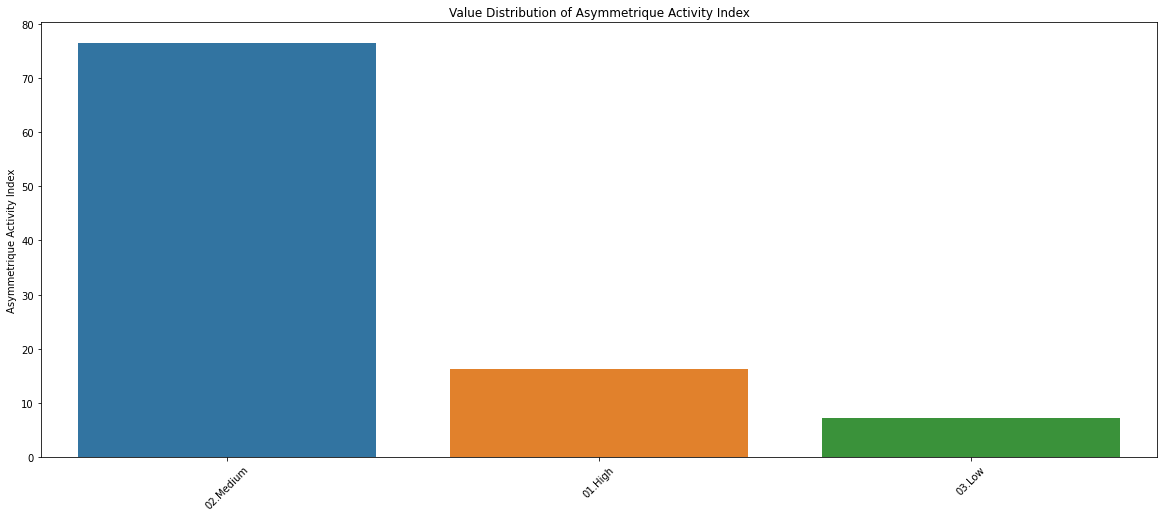

Asymmetrique Profile Index
02.Medium    55.515731
01.High      43.866985
03.Low        0.617284
Name: Asymmetrique Profile Index, dtype: float64
dict_keys(['02.Medium', '01.High', '03.Low'])


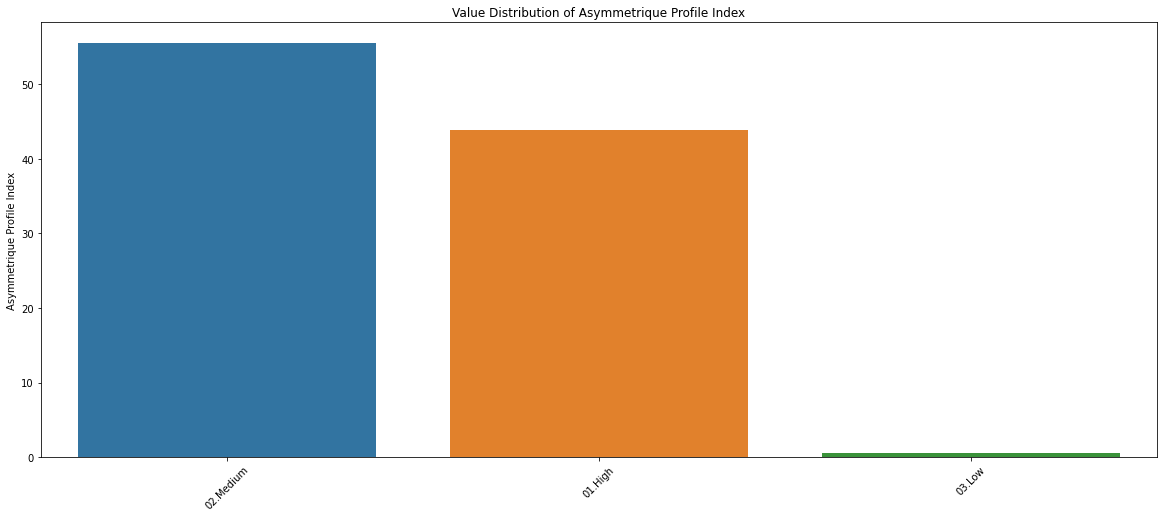

A free copy of Mastering The Interview
No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64
dict_keys(['No', 'Yes'])


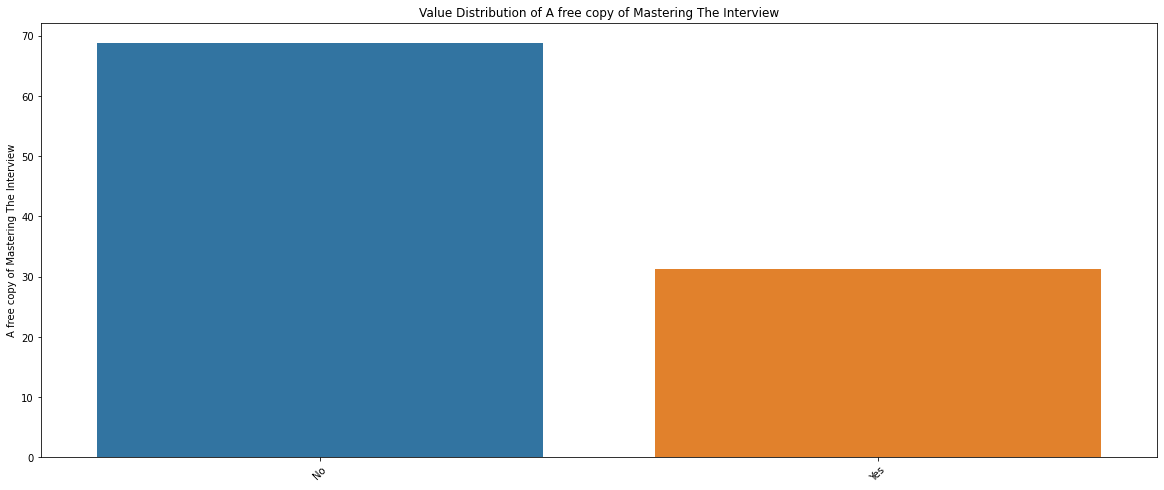

Last Notable Activity
Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Resubscribed to emails           0.010823
Approached upfront               0.010823
Email Received                   0.010823
Form Submitted on Website        0.010823
View in browser link Clicked     0.010823
Name: Last Notable Activity, dtype: float64
dict_keys(['Modified', 'Email Opened', 'SMS Sent', 'Page Visited on Website', 'Olark Chat Conversation', 'Email Link Clicked', 'Email Bounced', 'Unsubscribed', 'Unreachable', 'Had a Phone Conversation', 'Email Marked Spam', 'Resubscribed to emails', 'Approached 

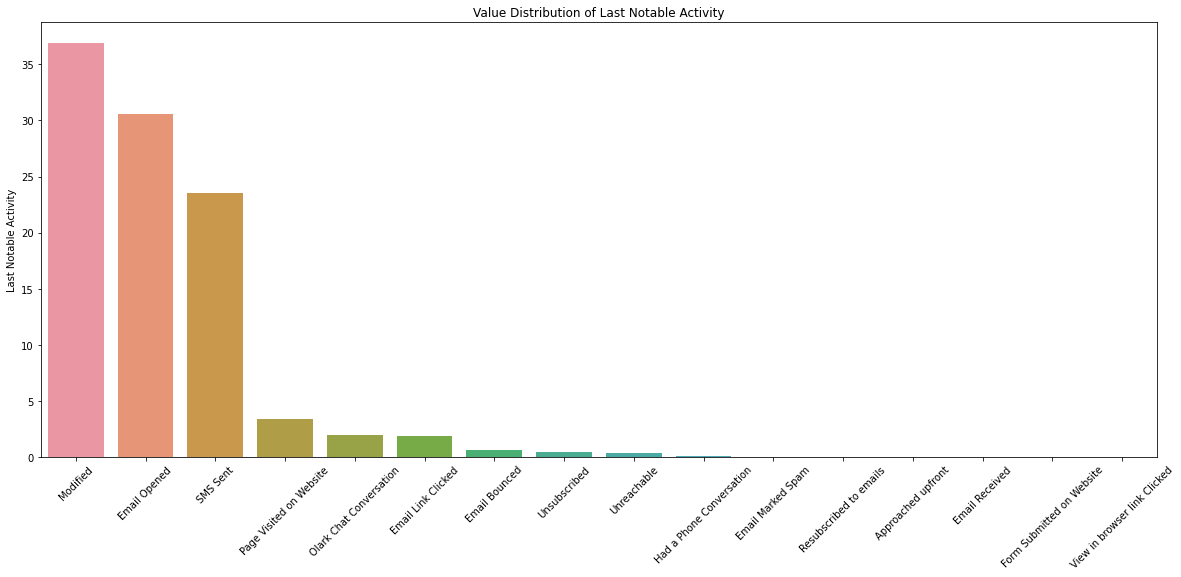

In [34]:
for cat in cat_cols:
    func_plotcatbar(cat)

**As can be observed, many of the categories have counts either highly skewed or ditributed across multiple category values with negligible counts.**


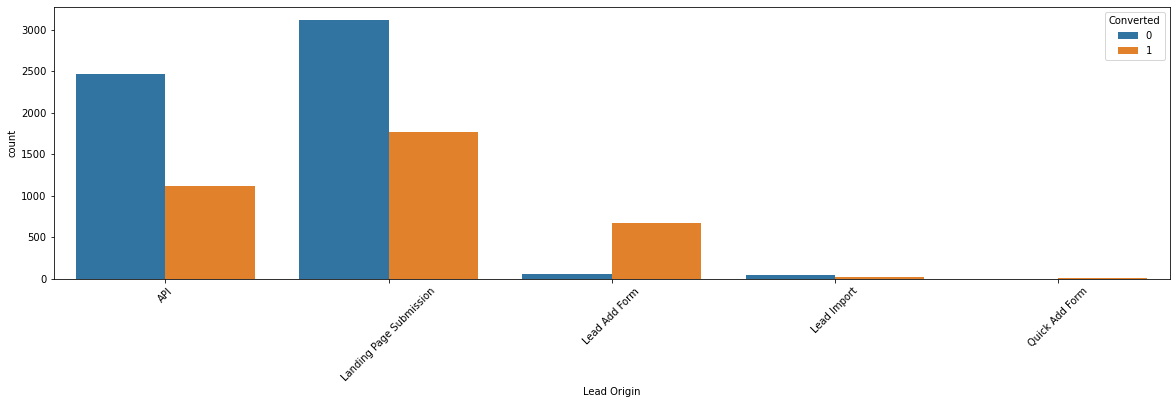

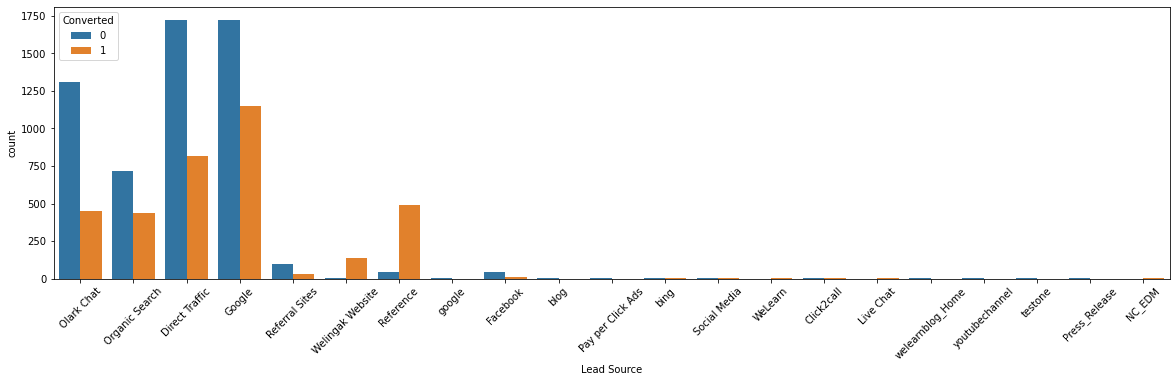

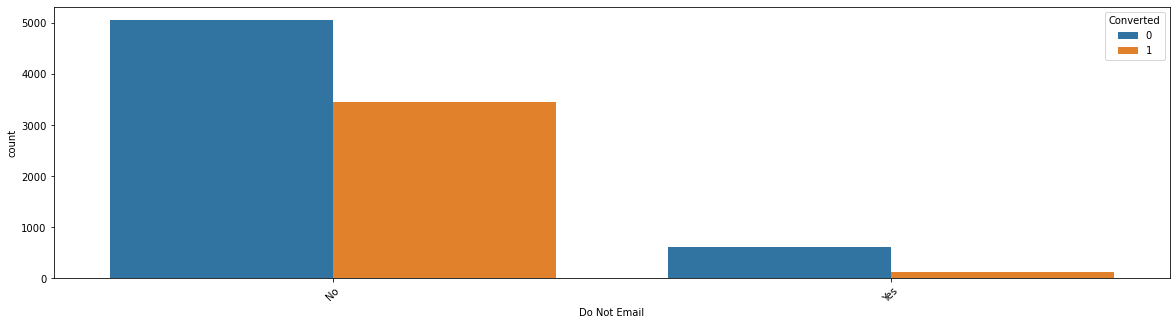

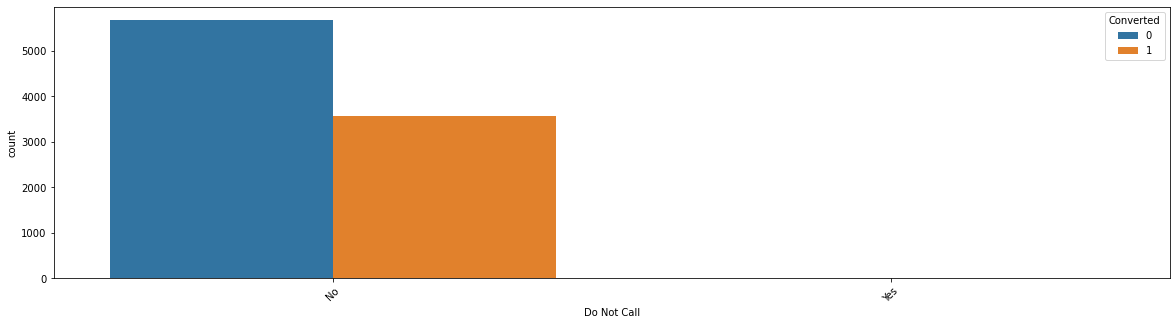

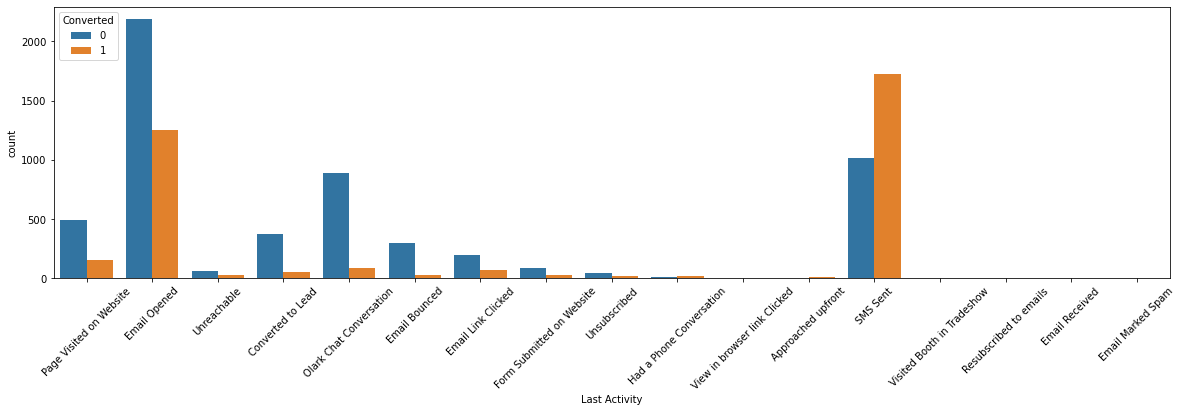

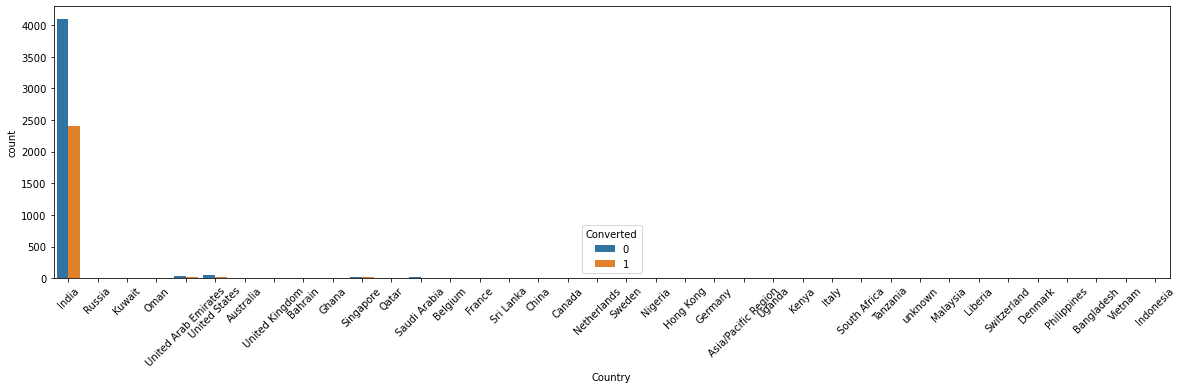

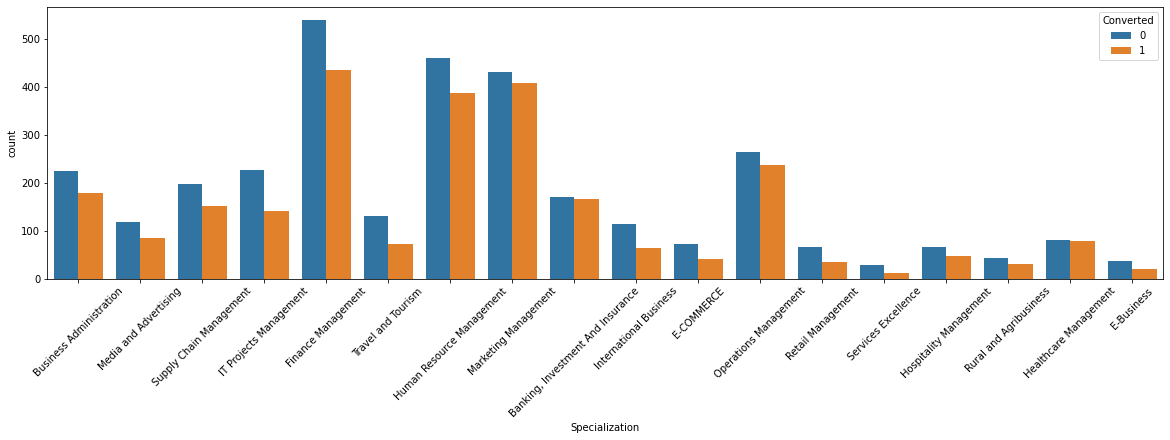

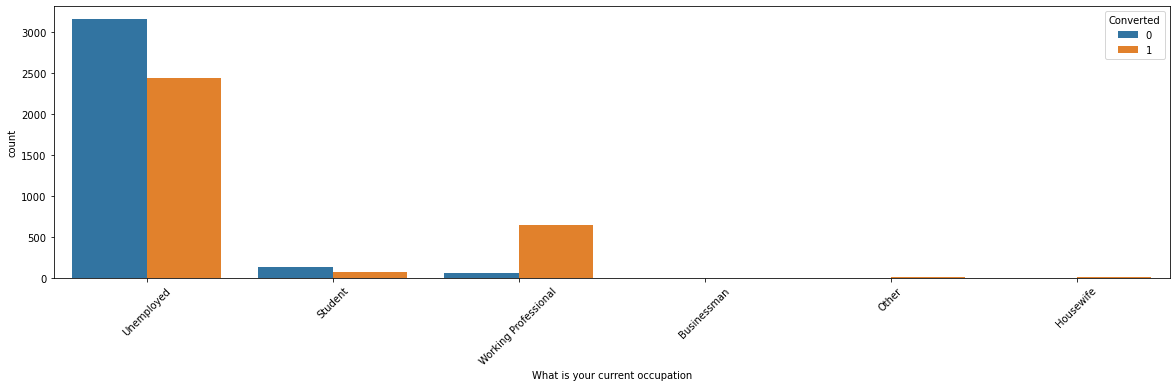

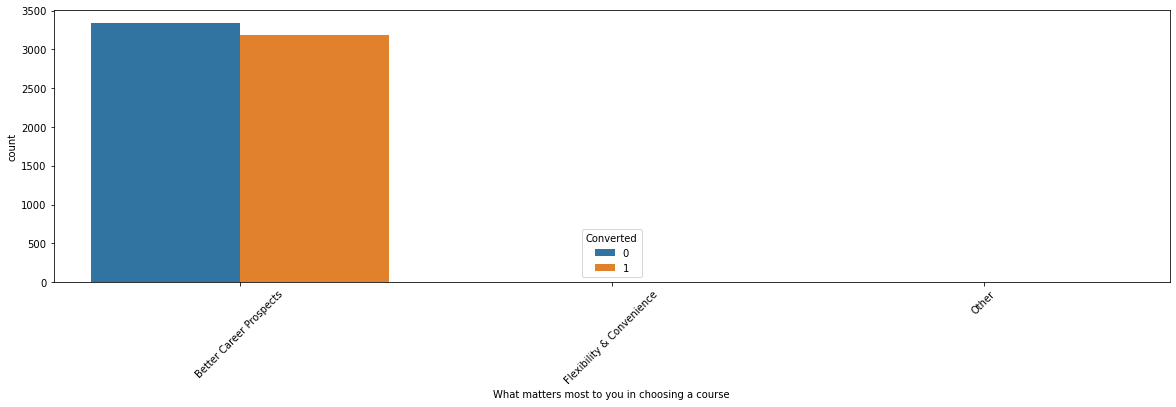

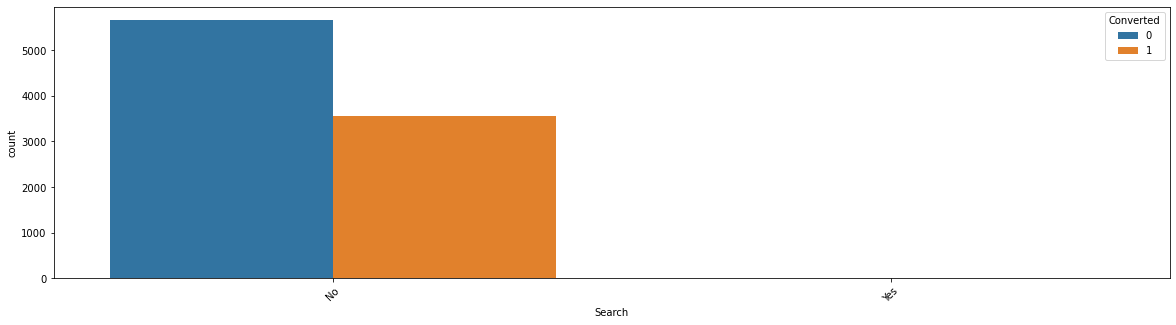

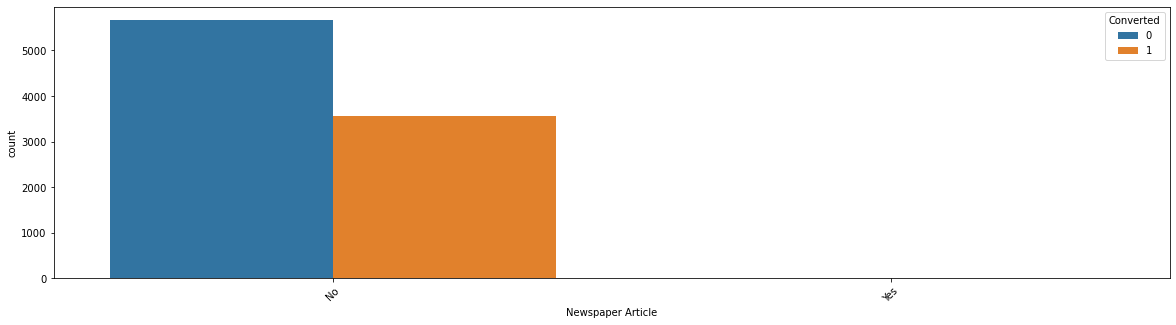

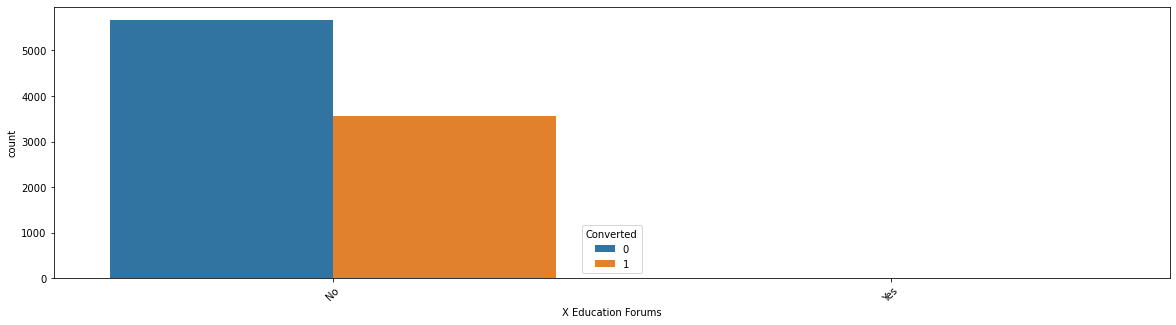

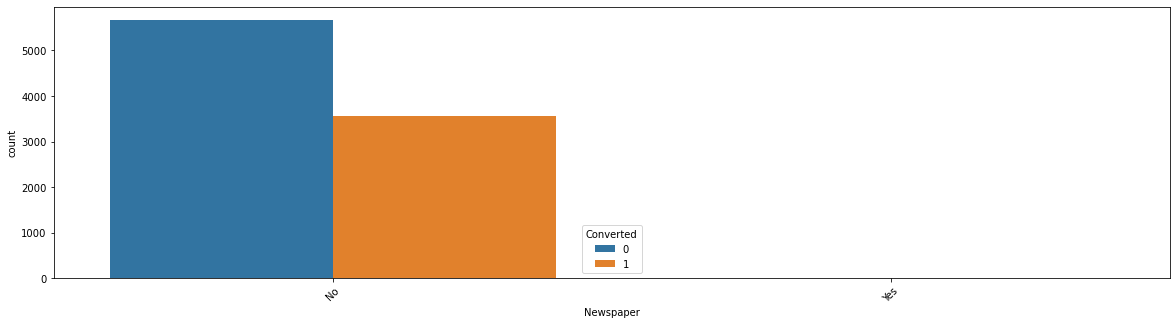

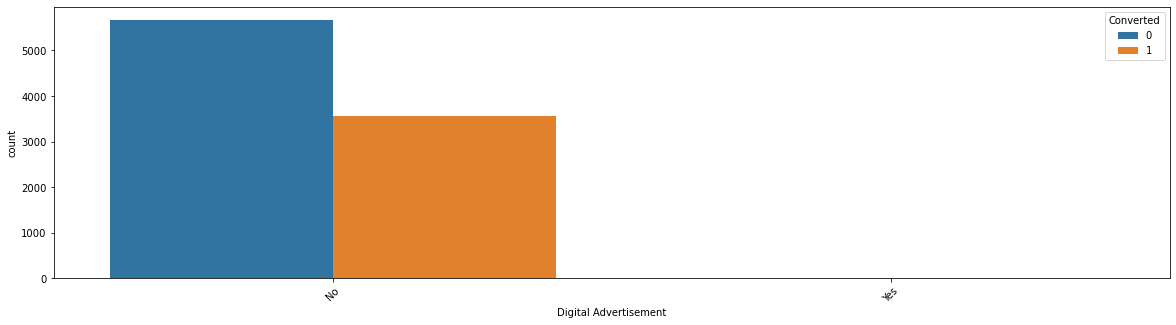

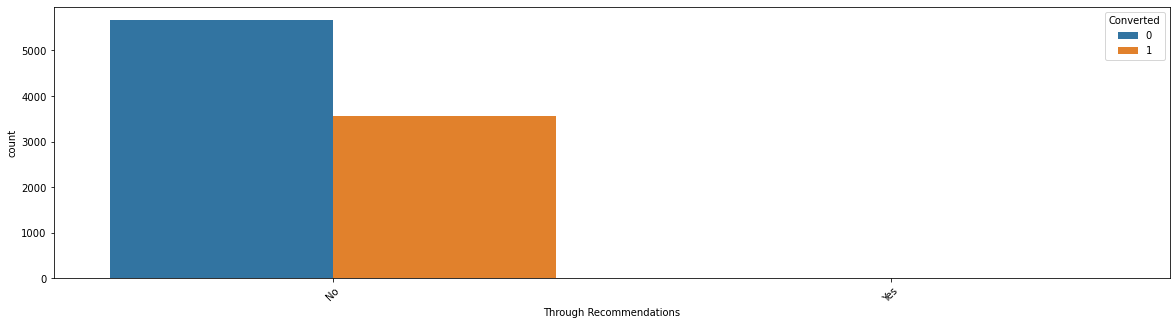

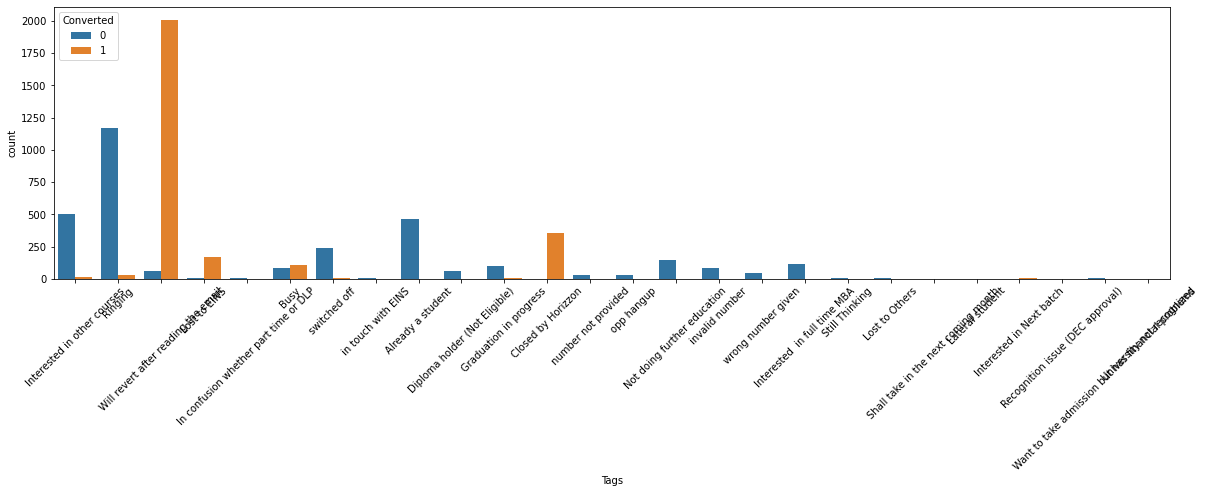

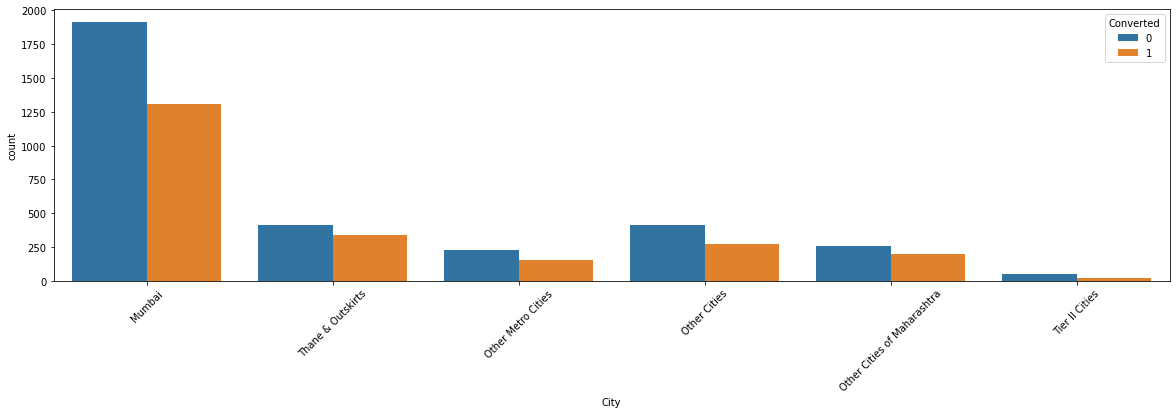

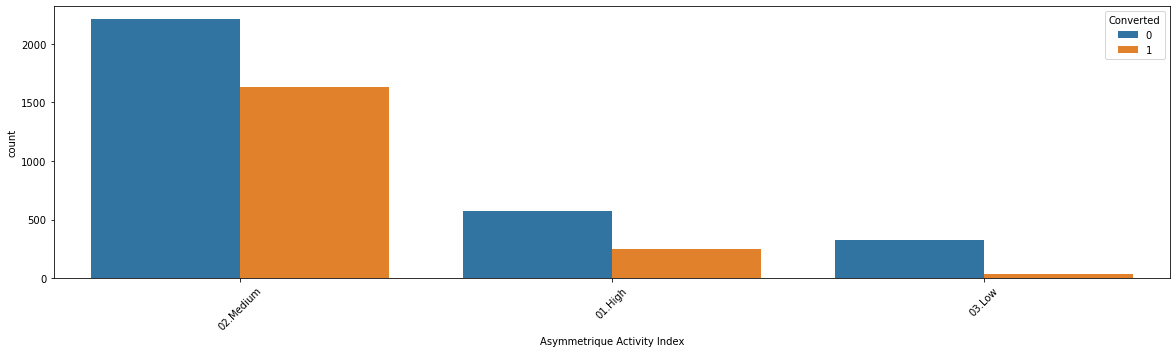

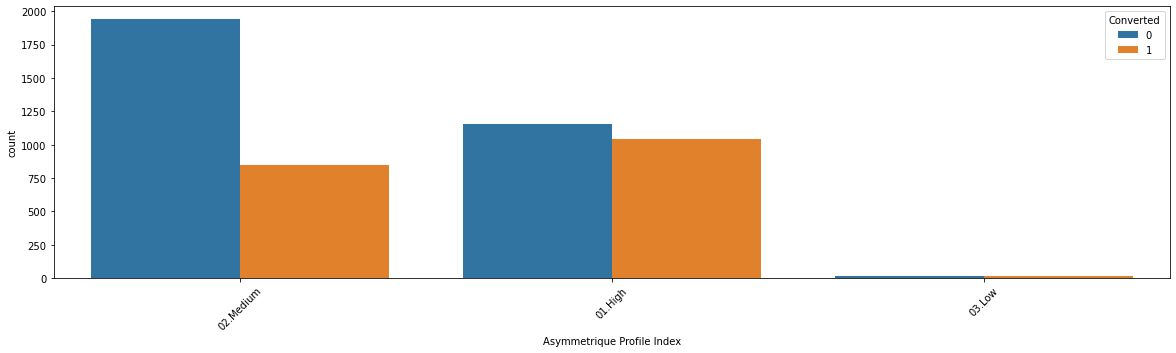

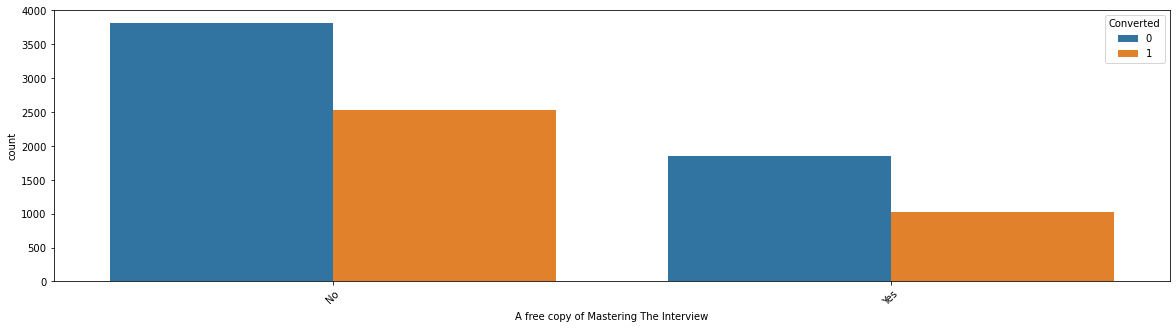

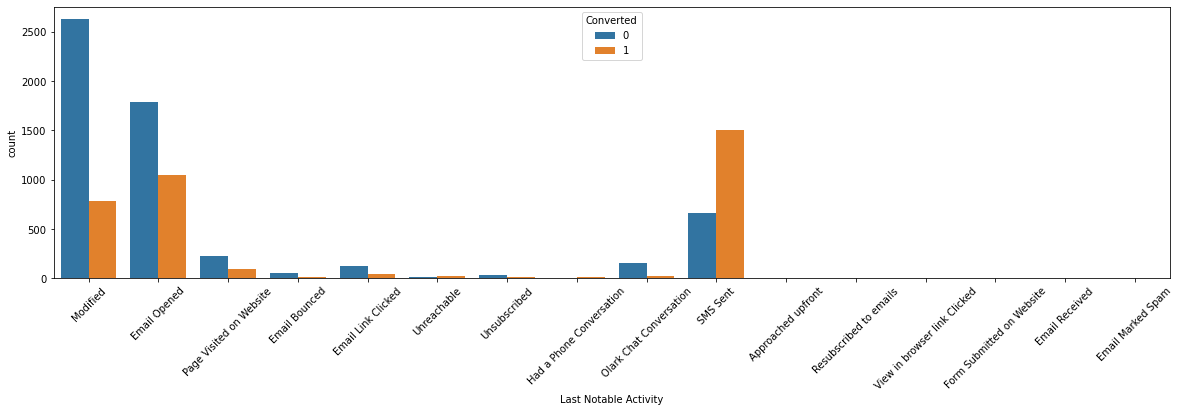

In [35]:
cat_cols = list(leads.select_dtypes(include=['object']).columns)
cat_cols
for i in range(1,len(cat_cols)+1):
    plt.figure(figsize=(20,5))
    sns.countplot(x=cat_cols[i-1],hue='Converted',data=leads)
    plt.xticks(rotation=45)
    plt.show()
    print("")

**For Lead Origin, while 'Lead Add Form' is a very low percentage of 'Lead Origin', a very high percentage are conversions.<br>
Here it would be a good idea to spend more on advertising using Lead Form**

**Similarly for Lead Source, 'Welingak Website' and 'Reference' constitute a low percentage of Lead Source but have very high conversion rate. <br>
It might be worth looking into advertising on 'Welingak Website' and ask satisfied customers to provide references.**

**Looking at similar high conversion factors for other variables:**
- **Last Activity -> SMS Sent**
- **Last Notable Activity -> SMS Sent**<br>
**It might be a good idea to follow up via SMS**

- **What is your current Occupation -> Working Professional**<br>
**Concentrating on Working Professionals might lead to more conversions**

- **Tags -> Will revert after reading the email, Closed by Horizzon**

**Dropping columns with highly skewed data i.e. >85% in one value. This indicates very less variance in data making the variable not helpful enough. <br> Combining minimal category values to 'Others' where applicable.**

In [36]:
#Combining values where values are <10% 
leads['Lead Origin'].replace(['Lead Add Form', 'Lead Import', 'Quick Add Form'],'Others',inplace=True) 
leads['Lead Source'].replace(['Reference', 'Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'google', 
                              'Click2call', 'Press_Release', 'Social Media', 'Live Chat', 'testone', 'Pay per Click Ads', 
                              'welearnblog_Home', 'blog', 'NC_EDM', 'youtubechannel', 'WeLearn'],'Others',inplace=True)
leads['Last Activity'].replace(['Page Visited on Website', 'Converted to Lead', 'Email Bounced', 'Email Link Clicked', 
                                'Form Submitted on Website', 'Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 
                                'Approached upfront', 'View in browser link Clicked', 'Email Marked Spam', 'Email Received', 
                                'Resubscribed to emails', 'Visited Booth in Tradeshow'],'Others',inplace=True) 
leads['Specialization'].replace(['Operations Management', 'Business Administration', 'IT Projects Management', 
                                 'Supply Chain Management', 'Banking, Investment And Insurance', 'Travel and Tourism', 
                                 'Media and Advertising', 'International Business', 'Healthcare Management', 
                                 'Hospitality Management', 'E-COMMERCE', 'Retail Management', 'Rural and Agribusiness', 
                                 'E-Business', 'Services Excellence'],'Others',inplace=True) 
leads['Tags'].replace(['Interested in other courses', 'Already a student', 'Closed by Horizzon', 'switched off', 'Busy', 
                       'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA', 
                       'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 
                       'opp hangup', 'number not provided', 'in touch with EINS', 'Lost to Others', 'Still Thinking', 
                       'Want to take admission but has financial problems', 'In confusion whether part time or DLP', 
                       'Interested in Next batch', 'Lateral student', 'University not recognized', 
                       'Shall take in the next coming month', 'Recognition issue (DEC approval)'],'Others',inplace=True)
leads['City'].replace(['Other Cities of Maharashtra', 'Other Metro Cities', 'Tier II Cities'],'Others',inplace=True) 
leads['Last Notable Activity'].replace(['Page Visited on Website', 'Olark Chat Conversation', 'Email Link Clicked', 
                                        'Email Bounced', 'Unsubscribed', 'Unreachable', 'Had a Phone Conversation', 
                                        'Email Marked Spam', 'Form Submitted on Website', 'Email Received', 
                                        'Resubscribed to emails', 'View in browser link Clicked', 'Approached upfront'],
                                       'Others',inplace=True) 

In [37]:
# Dropping columns with highly skewed data i.e. >85% in one value. 
leads.drop(['Do Not Email','Do Not Call','Country','What is your current occupation',
            'What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums',
            'Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)

In [38]:
leads.shape

(9240, 16)

In [39]:
findnull(leads)

,Total,%
Asymmetrique Profile Score,4218,45.649351
Asymmetrique Activity Score,4218,45.649351
Asymmetrique Profile Index,4218,45.649351
Asymmetrique Activity Index,4218,45.649351
City,3669,39.707792
Specialization,3380,36.580087
Tags,3353,36.287879
Page Views Per Visit,137,1.482684
TotalVisits,137,1.482684
Last Activity,103,1.114719


Imputing values for numeric and categorical columns where missing data is less than 2% by median and mode values respectively.

In [40]:
leads['Lead Source'].replace(np.NaN,leads['Lead Source'].mode()[0],inplace=True)
leads['Last Activity'].replace(np.NaN,leads['Last Activity'].mode()[0],inplace=True)
leads['Page Views Per Visit'].replace(np.NaN,leads['Page Views Per Visit'].median(),inplace=True)
leads['TotalVisits'].replace(np.NaN,leads['TotalVisits'].median(),inplace=True)

In [41]:
findnull(leads)

,Total,%
Asymmetrique Profile Score,4218,45.649351
Asymmetrique Activity Score,4218,45.649351
Asymmetrique Profile Index,4218,45.649351
Asymmetrique Activity Index,4218,45.649351
City,3669,39.707792
Specialization,3380,36.580087
Tags,3353,36.287879
Last Notable Activity,0,0.000000
A free copy of Mastering The Interview,0,0.000000
Last Activity,0,0.000000


#### Dropping columns related to Assymetrique profile and index since percentage of null values is quite high

In [42]:
leads.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
            'Asymmetrique Profile Score'],axis=1,inplace=True)

In [43]:
cat_cols = list(leads.select_dtypes(include=['object']).columns)
cat_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

#### Converting some binary variables (Yes/No) to 0/1

In [44]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [45]:
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Others,NaN,Others,NaN,0,Modified
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,NaN,Ringing,NaN,0,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Others,Will revert after reading the email,Mumbai,1,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Others,Ringing,Mumbai,0,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Others,NaN,Will revert after reading the email,Mumbai,0,Modified


In [46]:
cat_cols_new = leads.select_dtypes(include = 'object')
cat_cols_new.columns
for col in cat_cols_new:
    print(col)
    a = leads[col].value_counts(normalize=True)*100
    print(a)
    print('')

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Others                      8.376623
Name: Lead Origin, dtype: float64

Lead Source
Google            31.428571
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Others             9.567100
Name: Lead Source, dtype: float64

Last Activity
Email Opened               38.311688
SMS Sent                   29.707792
Others                     21.450216
Olark Chat Conversation    10.530303
Name: Last Activity, dtype: float64

Specialization
Others                       54.573379
Finance Management           16.655290
Human Resource Management    14.470990
Marketing Management         14.300341
Name: Specialization, dtype: float64

Tags
Others                                 44.368949
Will revert after reading the email    35.196195
Ringing                                20.434856
Name: Tags, dtype: float64

City
Mumbai               57.835218
Others               16.352540


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [47]:
# Creating a dummy variable for the categorical variables with missing values. 
# Each of these fields have 35%+ missing values. Imputing median values can skew data here.
# One way to impute missing values would be to mark the missing values as 'Missing' and drop the first dummy created.
# By default no dummy variable is created for NaN values. 
# Hence, leaving the NaN values as NaN but not dropping any column
dummy1=pd.get_dummies(leads[['Specialization','Tags','City']])

In [48]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy2 = pd.get_dummies(leads[['Last Activity','Lead Origin','Lead Source','Last Notable Activity']], drop_first=True)

In [49]:
# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1,dummy2], axis=1)

In [50]:
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,City,...,Last Activity_SMS Sent,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Others,NaN,Others,NaN,...,0,0,0,0,1,0,0,1,0,0
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,NaN,Ringing,NaN,...,0,0,0,0,0,1,0,0,0,0
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Others,Will revert after reading the email,Mumbai,...,0,1,0,0,0,0,0,0,0,0
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Others,Ringing,Mumbai,...,0,1,0,0,0,0,0,1,0,0
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Others,NaN,Will revert after reading the email,Mumbai,...,0,1,0,1,0,0,0,1,0,0


In [51]:
findnull(leads).head()

,Total,%
City,3669,39.707792
Specialization,3380,36.580087
Tags,3353,36.287879
Specialization_Marketing Management,0,0.000000
Specialization_Human Resource Management,0,0.000000


#### Dropping the repeated variables

In [52]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Last Activity','Specialization','Tags','City','Lead Origin','Lead Source',
                    'Last Notable Activity'], 1)

In [53]:
leads.shape

(9240, 28)

In [54]:
findnull(leads).head()

,Total,%
Last Notable Activity_SMS Sent,0,0.0
Last Notable Activity_Others,0,0.0
TotalVisits,0,0.0
Total Time Spent on Website,0,0.0
Page Views Per Visit,0,0.0


#### Checking for Outliers

In [55]:
# Checking for outliers in the numeric variables
num_cols =['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
leads[num_cols].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000


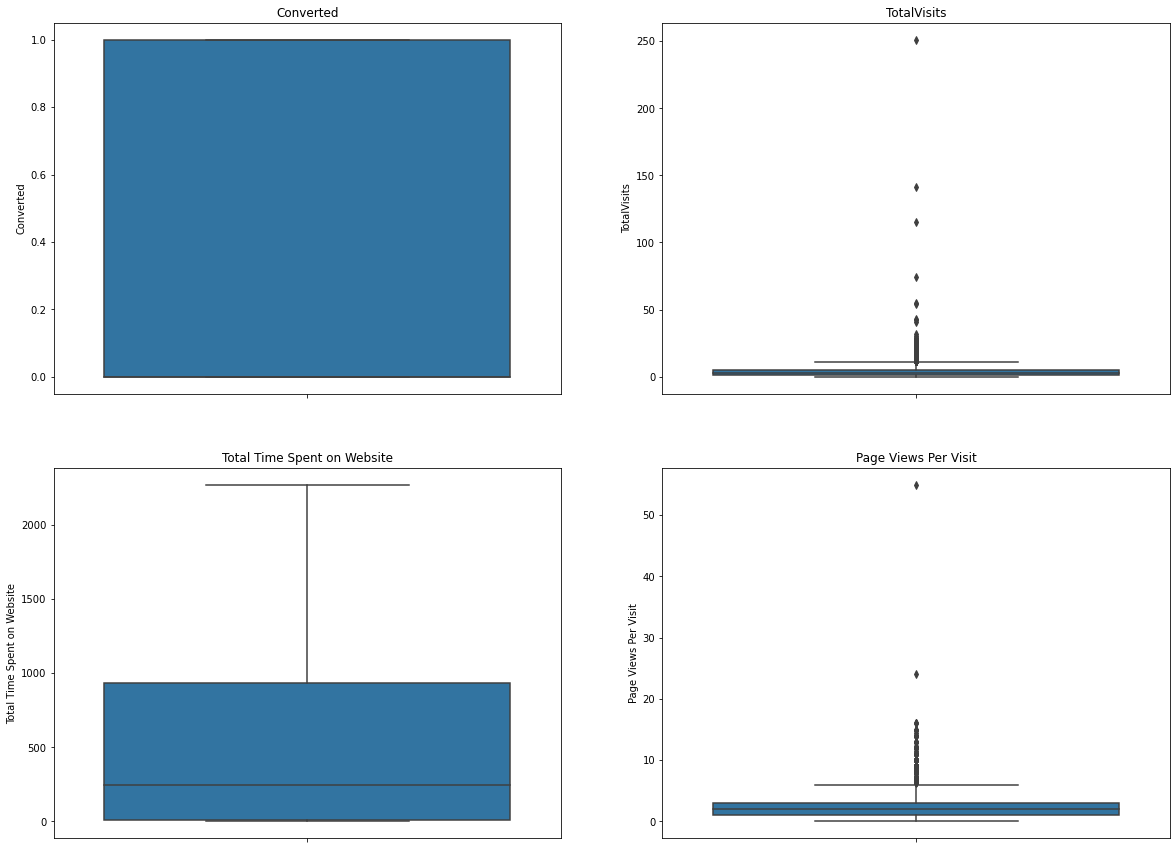

In [56]:
plt.figure(figsize=(20,15))
plt.tight_layout
for i in range(1,len(num_cols)+1):
    plt.subplot(2,2,i)
    sns.boxplot(leads[num_cols[i-1]],orient='v')
    plt.title(num_cols[i-1]);


**Since there appear to be a lot of outliers on the upper side, capping the values for 'TotalVisits' and 'Page Views Per Visit' to 95%**

In [57]:
cap = 0.95
outVars = ['TotalVisits','Page Views Per Visit']
for Vars in outVars:
    upperLimit = leads[Vars].quantile(cap)
    leads[Vars] = leads[Vars].apply(lambda x: upperLimit if x>upperLimit else x)

leads[num_cols].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.179221,487.698268,2.255105
std,0.486714,2.761219,548.021466,1.779471
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,10.000000,1840.610000,6.000000


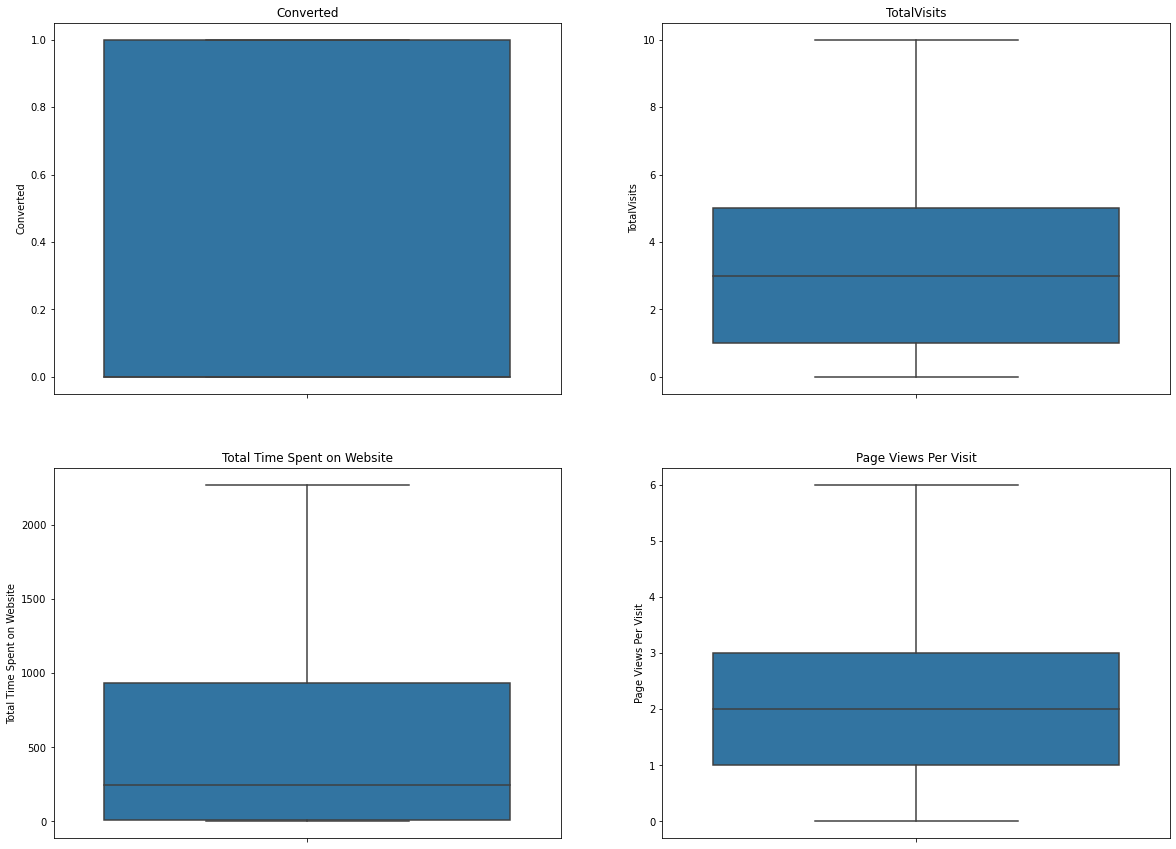

In [58]:
plt.figure(figsize=(20,15))
plt.tight_layout
for i in range(1,len(num_cols)+1):
    plt.subplot(2,2,i)
    sns.boxplot(leads[num_cols[i-1]],orient='v')
    plt.title(num_cols[i-1]);

#### Multivariate analysis

In [59]:
leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others,Tags_Others,...,Last Activity_SMS Sent,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
Converted,1.000000,0.045568,0.362483,-0.005289,-0.039820,0.043308,0.047130,0.065853,0.059609,-0.159326,...,0.325600,-0.051236,0.304783,0.027221,-0.129459,-0.005879,0.258792,-0.244294,-0.074044,0.351845
TotalVisits,0.045568,1.000000,0.357773,0.767585,0.297519,0.092340,0.091645,0.049931,0.260763,0.015483,...,0.020504,0.453501,-0.269207,0.209695,-0.500094,0.303545,-0.202212,-0.153681,0.097191,0.018463
Total Time Spent on Website,0.362483,0.357773,1.000000,0.360425,0.168298,0.074260,0.063852,0.067445,0.163269,-0.031417,...,0.117223,0.276009,-0.143442,0.199786,-0.376768,0.096123,-0.122749,-0.106857,-0.020590,0.125076
Page Views Per Visit,-0.005289,0.767585,0.360425,1.000000,0.299516,0.106620,0.097275,0.068489,0.295180,0.002015,...,0.079094,0.553423,-0.303352,0.254414,-0.573334,0.312665,-0.236048,-0.118344,-0.031084,0.068067
A free copy of Mastering The Interview,-0.039820,0.297519,0.168298,0.299516,1.000000,0.113144,0.086494,0.056164,0.356039,0.086903,...,0.032719,0.569633,-0.189553,-0.315671,-0.293169,0.147824,-0.185978,-0.084626,0.005972,0.028704
Specialization_Finance Management,0.043308,0.092340,0.074260,0.106620,0.113144,1.000000,-0.109243,-0.108533,-0.250022,0.013372,...,0.013139,0.199558,0.007936,0.051013,-0.134091,-0.030775,-0.005237,-0.042238,-0.003801,0.016256
Specialization_Human Resource Management,0.047130,0.091645,0.063852,0.097275,0.086494,-0.109243,1.000000,-0.100391,-0.231267,0.006896,...,0.014009,0.155891,0.024310,0.046419,-0.121432,-0.020306,0.020226,-0.024612,-0.009864,0.012080
Specialization_Marketing Management,0.065853,0.049931,0.067445,0.068489,0.056164,-0.108533,-0.100391,1.000000,-0.229763,0.023526,...,0.018184,0.129763,0.024219,0.055713,-0.107767,-0.052050,0.016435,-0.031237,-0.023196,0.018678
Specialization_Others,0.059609,0.260763,0.163269,0.295180,0.356039,-0.250022,-0.231267,-0.229763,1.000000,0.037373,...,0.070167,0.455715,-0.081201,-0.028465,-0.279786,0.101566,-0.086589,-0.082129,-0.014807,0.061301
Tags_Others,-0.159326,0.015483,-0.031417,0.002015,0.086903,0.013372,0.006896,0.023526,0.037373,1.000000,...,-0.180905,0.060091,0.008851,-0.036713,-0.070530,0.004931,0.018064,0.221128,0.030396,-0.196101


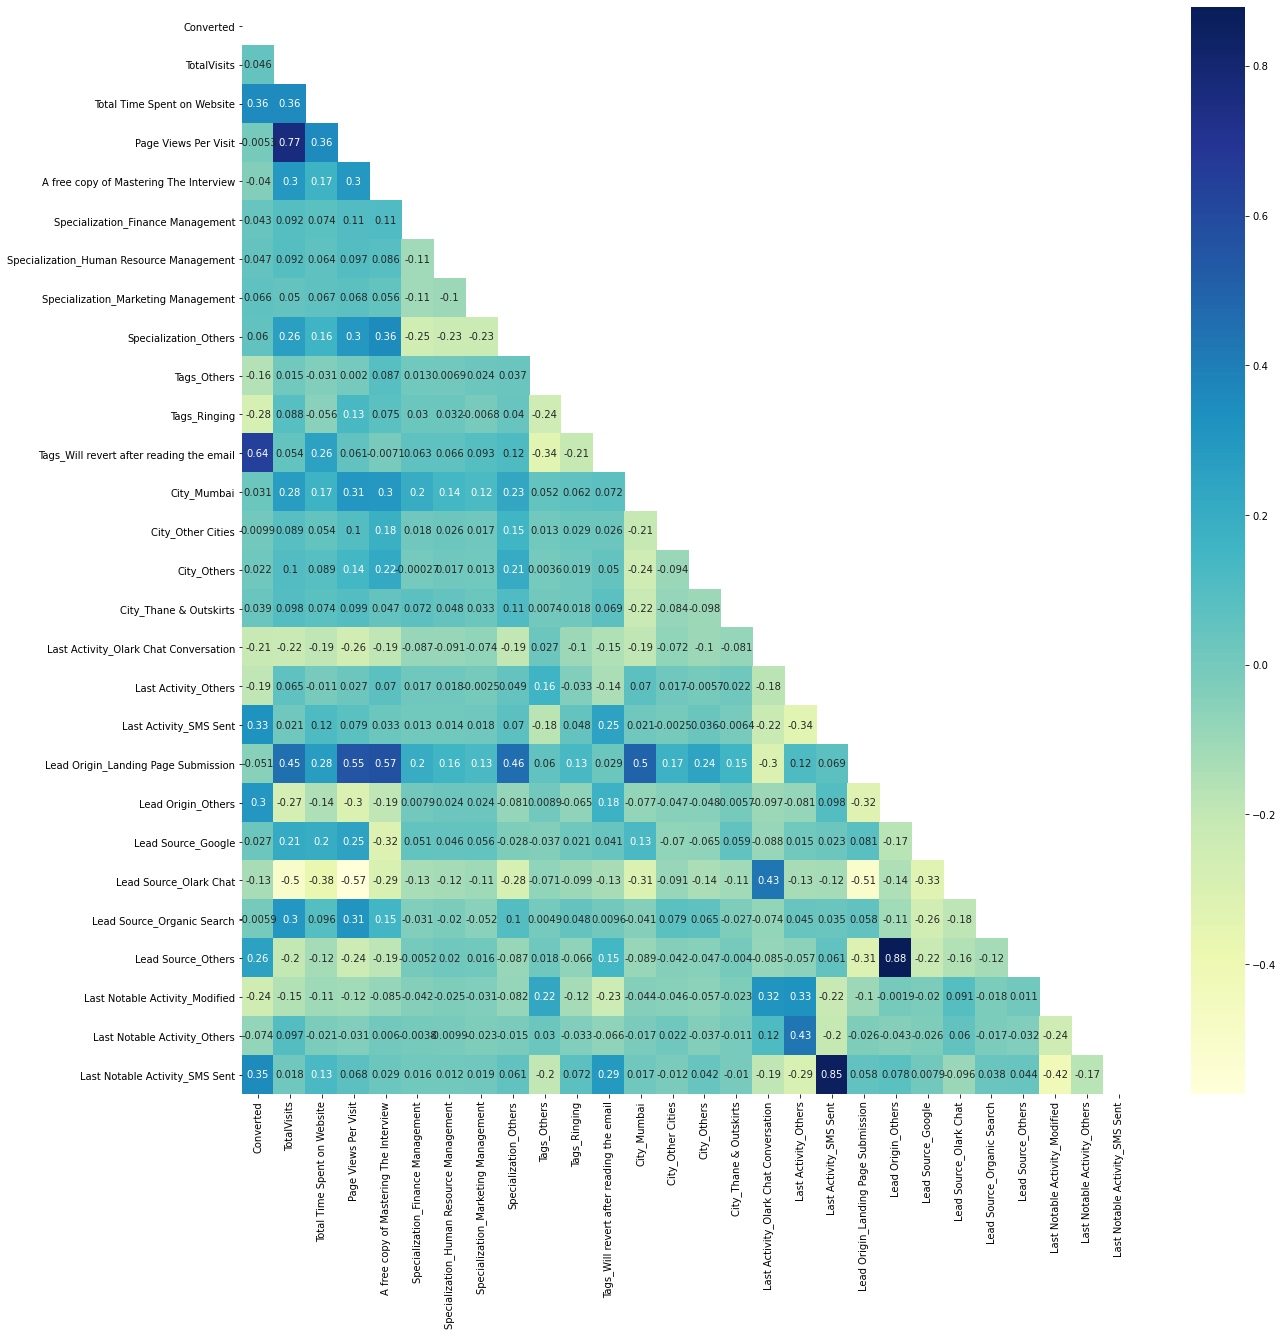

In [60]:
matrix = np.triu(leads.corr())
plt.figure(figsize=(20,20))
sns.heatmap(leads.corr(),annot=True,cmap='YlGnBu',mask=matrix);

**It appears that the columns with highest correlation amongst themselves are:**
- Lead origin_Others and Lead Source_Others: 0.88
- Last Notable Activity_SMS Sent and Last Activity_SMS Sent: 0.85
- Page Views Per Visit and TotaVisits: 0.77

**This might lead to multicollinearity. We will look at this using VIFs post defining model**

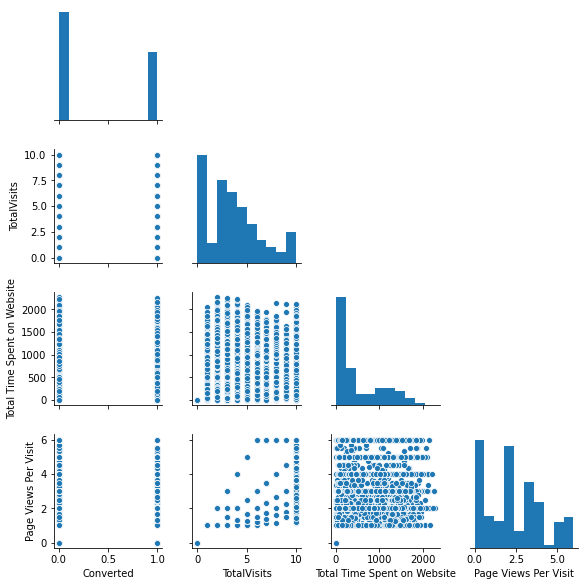

In [61]:
#Looking at pair plots between the numeric columns
sns.pairplot(leads[num_cols],height=2,corner=True);

### Step 3: Train/Test Split

In [62]:
# Using np.random to ensure each time we run the notebook, the same train/test split takes place
np.random.seed(0) 
leads_train,leads_test=train_test_split(leads,train_size=0.7,test_size=0.3,random_state=100)

In [63]:
print("Shape of train dataset is ",leads_train.shape)
print("Shape of test dataset is ",leads_test.shape)

Shape of train dataset is  (6468, 28)
Shape of test dataset is  (2772, 28)


In [64]:
y_train = leads_train.pop('Converted')
X_train = leads_train
print(y_train.head())
X_train.head()

Lead Number
641410    0
597687    0
626825    0
587928    0
622366    0
Name: Converted, dtype: int64


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others,Tags_Others,Tags_Ringing,...,Last Activity_SMS Sent,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,
641410,0.0,0,0.00,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
597687,4.0,487,1.33,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
626825,5.0,106,2.50,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
587928,5.0,1230,5.00,0,0,0,0,1,0,1,...,1,1,0,1,0,0,0,0,0,1
622366,0.0,0,0.00,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [65]:
y_test = leads_test.pop('Converted')
X_test = leads_test
print(y_test.head())
X_test.head()

Lead Number
619003    1
636884    1
590281    1
579892    0
617929    1
Name: Converted, dtype: int64


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others,Tags_Others,Tags_Ringing,...,Last Activity_SMS Sent,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,
619003,8.0,1011,6.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
636884,0.0,0,0.0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
590281,5.0,59,5.0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
579892,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
617929,0.0,0,0.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [66]:
XCols = list(X_train.columns)
XCols

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview',
 'Specialization_Finance Management',
 'Specialization_Human Resource Management',
 'Specialization_Marketing Management',
 'Specialization_Others',
 'Tags_Others',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'City_Mumbai',
 'City_Other Cities',
 'City_Others',
 'City_Thane & Outskirts',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Others',
 'Last Activity_SMS Sent',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Others',
 'Lead Source_Google',
 'Lead Source_Olark Chat',
 'Lead Source_Organic Search',
 'Lead Source_Others',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Others',
 'Last Notable Activity_SMS Sent']

### Step 4: Feature Scaling

In [67]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [68]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others,Tags_Others,Tags_Ringing,...,Last Activity_SMS Sent,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,
641410,-1.149699,-0.885371,-1.266675,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
597687,0.299722,0.005716,-0.516439,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
626825,0.662077,-0.691418,0.143543,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
587928,0.662077,1.365219,1.553761,0,0,0,0,1,0,1,...,1,1,0,1,0,0,0,0,0,1
622366,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


### Step 5: Model Building

In [69]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1789.2
Date:                Mon, 08 Feb 2021   Deviance:                       3578.4
Time:                        16:50:05   Pearson chi2:                 1.42e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7270      0.176     -9.821      0.000      -2.072      -1.382
TotalVisits                                  0.4882      0.066      7.413      0.000       0.359       0.617
Total Time Spent on Website                  1.0692      0.050     21.468      0.000       0.972       1.167
Page Views Per Visit                        -0.4898      0.079     -6.221      0.000      -0.644      -0.336
A free copy of Mastering The Interview      -0.0467      0.137     -0.341      0.733      -0.315       0.222
Specialization_Finance Management            0.9873      0.242      4.073      0.000       0.512       1.462
Specialization_Human Resource Management     0.6003      0.246      2.440      0.015       0.118       1.083
Specialization_Marketing Management          0.6625      0.238      2.783      0.005       0.196       1.129
Specialization_Others                        0.6424      0.213      3.019      0.003       0.225       1.060
Tags_Others                                 -0.0041      0.099     -0.041      0.967      -0.198       0.190
Tags_Ringing                                -3.4794      0.239    -14.570      0.000      -3.947      -3.011
Tags_Will revert after reading the email     4.3226      0.184     23.486      0.000       3.962       4.683
City_Mumbai                                 -0.5440      0.224     -2.425      0.015      -0.984      -0.104
City_Other Cities                           -0.4664      0.264     -1.769      0.077      -0.983       0.050
City_Others                                 -0.6890      0.252     -2.732      0.006      -1.183      -0.195
City_Thane & Outskirts                      -0.5928      0.262     -2.264      0.024      -1.106      -0.079
Last Activity_Olark Chat Conversation       -1.6817      0.236     -7.131      0.000      -2.144      -1.219
Last Activity_Others                        -1.0224      0.185     -5.520      0.000      -1.385      -0.659
Last Activity_SMS Sent                       0.2615      0.204      1.285      0.199      -0.137       0.660
Lead Origin_Landing Page Submission         -0.2543      0.193     -1.321      0.186      -0.632       0.123
Lead Origin_Others                           3.4813      0.353      9.869      0.000       2.790       4.173
Lead Source_Google                           0.2802      0.144      1.952      0.051      -0.001       0.562
Lead Source_Olark Chat                       1.1025      0.201      5.497      0.000       0.709       1.496
Lead Source_Organic Search                   0.0414      0.169      0.245      0.806      -0.290       0.372
Lead Source_Others                           0.2198      0.322      0.683      0.495      -0.411       0.850
Last Notable Activity_Modified 

**As is observed, a lot of features display p-value>0.05 making the coefficients insignificant. Using RFE to select more significant features.**

### Step 6: Feature Selection Using RFE

In [70]:
logreg = LogisticRegression()

In [71]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [72]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 11),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', False, 2),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Others', True, 1),
 ('Tags_Others', False, 13),
 ('Tags_Ringing', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('City_Mumbai', False, 5),
 ('City_Other Cities', False, 6),
 ('City_Others', False, 3),
 ('City_Thane & Outskirts', False, 4),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_SMS Sent', False, 9),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Others', True, 1),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 12),
 ('Lead Source_Others', False, 7),
 ('Last Notable Activity_Modified', F

In [73]:
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Specialization_Finance Management',
       'Specialization_Marketing Management', 'Specialization_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Olark Chat', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [74]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview',
       'Specialization_Human Resource Management', 'Tags_Others',
       'City_Mumbai', 'City_Other Cities', 'City_Others',
       'City_Thane & Outskirts', 'Last Activity_SMS Sent',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Last Notable Activity_Modified'],
      dtype='object')

In [75]:
X_train_rfe = X_train[col]

#### Assessing the model with StatsModels

In [76]:
X_train_rfe = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1798.9
Date:                Mon, 08 Feb 2021   Deviance:                       3597.9
Time:                        16:50:06   Pearson chi2:                 1.26e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5027      0.108    -13.952      0.000      -1.714      -1.292
TotalVisits                                  0.4735      0.065      7.333      0.000       0.347       0.600
Total Time Spent on Website                  1.0691      0.049     21.672      0.000       0.972       1.166
Page Views Per Visit                        -0.4738      0.077     -6.186      0.000      -0.624      -0.324
Specialization_Finance Management            0.5006      0.171      2.933      0.003       0.166       0.835
Specialization_Marketing Management          0.2237      0.177      1.261      0.207      -0.124       0.571
Specialization_Others                        0.1411      0.129      1.093      0.275      -0.112       0.394
Tags_Ringing                                -3.5026      0.235    -14.930      0.000      -3.962      -3.043
Tags_Will revert after reading the email     4.3092      0.173     24.929      0.000       3.970       4.648
Last Activity_Olark Chat Conversation       -1.7655      0.201     -8.770      0.000      -2.160      -1.371
Last Activity_Others                        -1.1080      0.138     -8.036      0.000      -1.378      -0.838
Lead Origin_Landing Page Submission         -0.4392      0.140     -3.139      0.002      -0.713      -0.165
Lead Origin_Others                           3.4889      0.215     16.210      0.000       3.067       3.911
Lead Source_Olark Chat                       0.8912      0.167      5.350      0.000       0.565       1.218
Last Notable Activity_Others                 0.6328      0.181      3.503      0.000       0.279       0.987
Last Notable Activity_SMS Sent               1.7952      0.112     15.994      0.000       1.575       2.015
============================================================================================================
"""

**Certain features still have p-value>0.05. The model can now be manually tuned by dropping these one-by-one**

In [77]:
# Checking VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def func_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
func_VIF(X_train_rfe)

,Features,VIF
0,const,7.18
3,Page Views Per Visit,3.18
1,TotalVisits,2.60
11,Lead Origin_Landing Page Submission,2.56
13,Lead Source_Olark Chat,2.48
6,Specialization_Others,1.93
12,Lead Origin_Others,1.71
10,Last Activity_Others,1.53
4,Specialization_Finance Management,1.42
9,Last Activity_Olark Chat Conversation,1.40


Dropping order for variables
1. High p-value, high VIF
2. High p-value, low VIF
3. Low p-value, high VIF

In [78]:
# Dropping Specialization_Others with the highest p-value despite low VIF
X_train_rfe.drop('Specialization_Others',axis=1,inplace=True)

In [79]:
# Building model again
X_train_rfe = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1799.5
Date:                Mon, 08 Feb 2021   Deviance:                       3599.1
Time:                        16:50:06   Pearson chi2:                 1.28e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4876      0.107    -13.938      0.000      -1.697      -1.278
TotalVisits                                  0.4774      0.064      7.407      0.000       0.351       0.604
Total Time Spent on Website                  1.0708      0.049     21.718      0.000       0.974       1.167
Page Views Per Visit                        -0.4700      0.077     -6.141      0.000      -0.620      -0.320
Specialization_Finance Management            0.4085      0.148      2.756      0.006       0.118       0.699
Specialization_Marketing Management          0.1365      0.158      0.862      0.389      -0.174       0.447
Tags_Ringing                                -3.5102      0.235    -14.943      0.000      -3.971      -3.050
Tags_Will revert after reading the email     4.3266      0.172     25.127      0.000       3.989       4.664
Last Activity_Olark Chat Conversation       -1.7654      0.201     -8.794      0.000      -2.159      -1.372
Last Activity_Others                        -1.1026      0.138     -8.006      0.000      -1.373      -0.833
Lead Origin_Landing Page Submission         -0.3585      0.119     -3.021      0.003      -0.591      -0.126
Lead Origin_Others                           3.5247      0.213     16.551      0.000       3.107       3.942
Lead Source_Olark Chat                       0.8977      0.166      5.397      0.000       0.572       1.224
Last Notable Activity_Others                 0.6256      0.180      3.469      0.001       0.272       0.979
Last Notable Activity_SMS Sent               1.7957      0.112     15.986      0.000       1.576       2.016
============================================================================================================
"""

In [80]:
# Checking VIF
func_VIF(X_train_rfe)

,Features,VIF
0,const,7.03
3,Page Views Per Visit,3.17
1,TotalVisits,2.60
12,Lead Source_Olark Chat,2.48
10,Lead Origin_Landing Page Submission,1.92
11,Lead Origin_Others,1.68
9,Last Activity_Others,1.53
8,Last Activity_Olark Chat Conversation,1.40
13,Last Notable Activity_Others,1.36
2,Total Time Spent on Website,1.34


In [81]:
# Dropping Specialization_Marketing Management with the highest p-value despite low VIF
X_train_rfe.drop('Specialization_Marketing Management',axis=1,inplace=True)

# Building model again
X_train_rfe = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1799.9
Date:                Mon, 08 Feb 2021   Deviance:                       3599.8
Time:                        16:50:06   Pearson chi2:                 1.26e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4829      0.107    -13.917      0.000      -1.692      -1.274
TotalVisits                                  0.4770      0.064      7.401      0.000       0.351       0.603
Total Time Spent on Website                  1.0707      0.049     21.714      0.000       0.974       1.167
Page Views Per Visit                        -0.4699      0.077     -6.142      0.000      -0.620      -0.320
Specialization_Finance Management            0.3890      0.146      2.657      0.008       0.102       0.676
Tags_Ringing                                -3.5121      0.235    -14.949      0.000      -3.973      -3.052
Tags_Will revert after reading the email     4.3297      0.172     25.154      0.000       3.992       4.667
Last Activity_Olark Chat Conversation       -1.7627      0.201     -8.789      0.000      -2.156      -1.370
Last Activity_Others                        -1.1000      0.138     -7.994      0.000      -1.370      -0.830
Lead Origin_Landing Page Submission         -0.3418      0.117     -2.922      0.003      -0.571      -0.113
Lead Origin_Others                           3.5263      0.213     16.567      0.000       3.109       3.943
Lead Source_Olark Chat                       0.8963      0.166      5.391      0.000       0.570       1.222
Last Notable Activity_Others                 0.6224      0.180      3.453      0.001       0.269       0.976
Last Notable Activity_SMS Sent               1.7960      0.112     15.986      0.000       1.576       2.016
============================================================================================================
"""

In [82]:
# Checking VIF
func_VIF(X_train_rfe)

,Features,VIF
0,const,7.00
3,Page Views Per Visit,3.17
1,TotalVisits,2.60
11,Lead Source_Olark Chat,2.48
9,Lead Origin_Landing Page Submission,1.89
10,Lead Origin_Others,1.68
8,Last Activity_Others,1.53
7,Last Activity_Olark Chat Conversation,1.40
12,Last Notable Activity_Others,1.36
2,Total Time Spent on Website,1.34


**Both p-values and VIF for remaining features are in acceptable values (p-value<0.05 and VIF<5). Hence proceeding with these features for model evaluation**

In [83]:
y_train_pred = res.predict(X_train_rfe).values.reshape(-1)

In [84]:
y_train_pred[:10]

array([0.00669355, 0.19264498, 0.01004382, 0.07632196, 0.18425486,
       0.99850435, 0.00305072, 0.66789764, 0.12136686, 0.99901775])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [85]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.006694,641410
1,0,0.192645,597687
2,0,0.010044,626825
3,0,0.076322,587928
4,0,0.184255,622366


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [86]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.006694,641410,0
1,0,0.192645,597687,0
2,0,0.010044,626825,0
3,0,0.076322,587928,0
4,0,0.184255,622366,0


#### Looking at metrics for the model built

In [87]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3752  250]
 [ 452 2014]]


In [88]:
# Predicted     Not_Converted    Converted
# Actual
# Not_Converted      3752           250
# Converted         452           2014  

In [89]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.891465677179963


## Metrics using Confusion Matrix

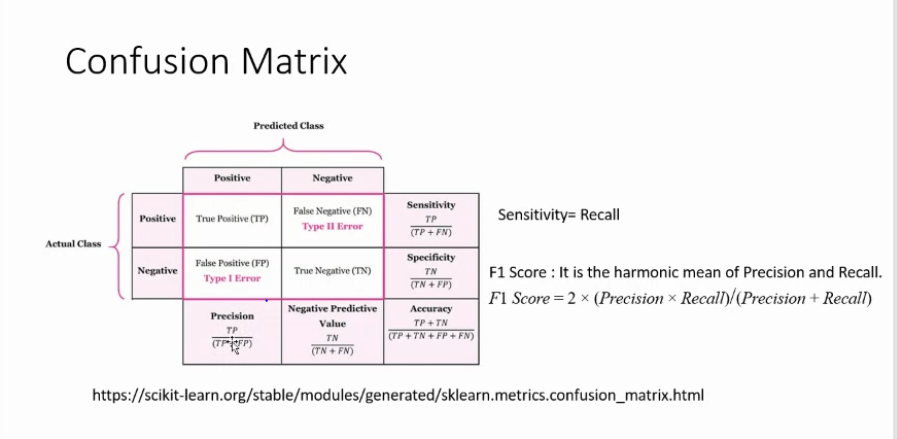

In [90]:
# Creating function to determine various metrics

def func_metrics(Confusion):
    list1 = ['accuracy','sensitivity/Recall','specificity','FPR','FNR','Precision','NPV']

    TP = Confusion[1,1] # true positive 
    TN = Confusion[0,0] # true negatives
    FP = Confusion[0,1] # false positives
    FN = Confusion[1,0] # false negatives

    total1=sum(sum(Confusion))
    accuracy = (TN+TP)/total1

    speci = TN/(TN+FP)#'specificity/True Negative Rate(TNR)'
    sensi = TP/(FN+TP)#'sensitivity/True Positive Rate(TPR)/Recall/HitRate'
    FPR = FP/(TN+FP)#'False Positive Rate(FPR)'
    FNR = FN/(FN+TP)#'False Negative Rate(FNR)'
    PPV = TP /(TP+FP)#'Positive Predictive Value(PPV)/Precision'
    NPV = TN /(TN+ FN)#'Negative Predictive Value(NPV)'

    list2 = [accuracy,sensi,speci,FPR,FNR,PPV,NPV]
    metricsDict = zip(list1,list2)
    metrics_df = pd.DataFrame(metricsDict,columns=['Metric','Value'])
    return metrics_df

In [91]:
# Creating confusion matrix for threshold = 0.5
func_metrics(confusion)

,Metric,Value
0,accuracy,0.891466
1,sensitivity/Recall,0.816707
2,specificity,0.937531
3,FPR,0.062469
4,FNR,0.183293
5,Precision,0.889576
6,NPV,0.892483


### Step 7: Plotting the ROC Curve

In [92]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

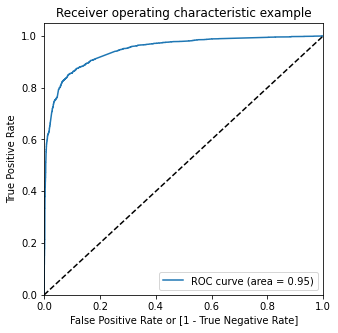

In [93]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 8: Finding Optimal Threshold
Optimal threshold probability is that prob where we get balanced sensitivity and specificity

In [94]:
# Let's create columns with different probability thresholds 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.006694,641410,0,1,0,0,0,0,0,0,0,0,0
1,0,0.192645,597687,0,1,1,0,0,0,0,0,0,0,0
2,0,0.010044,626825,0,1,0,0,0,0,0,0,0,0,0
3,0,0.076322,587928,0,1,0,0,0,0,0,0,0,0,0
4,0,0.184255,622366,0,1,1,0,0,0,0,0,0,0,0


In [95]:
# Now let's calculate accuracy sensitivity and specificity for various probability thresholds.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.757885  0.967559  0.628686
0.2   0.2  0.858071  0.906326  0.828336
0.3   0.3  0.878324  0.875101  0.880310
0.4   0.4  0.889610  0.845499  0.916792
0.5   0.5  0.891466  0.816707  0.937531
0.6   0.6  0.880952  0.757097  0.957271
0.7   0.7  0.875387  0.721411  0.970265
0.8   0.8  0.853278  0.645985  0.981009
0.9   0.9  0.835034  0.580697  0.991754


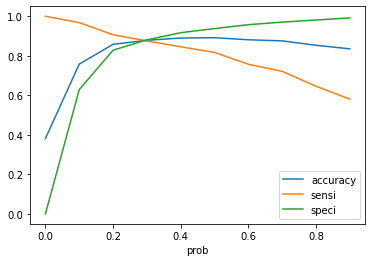

In [96]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to consider as threshold.

In [97]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.006694,641410,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.192645,597687,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.010044,626825,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.076322,587928,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.184255,622366,0,1,1,0,0,0,0,0,0,0,0,0


In [98]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.8783240568954854


In [99]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3523,  479],
       [ 308, 2158]], dtype=int64)

In [100]:
# Finding metrics for confusion metrics with threshold = 0.3
func_metrics(confusion2)

,Metric,Value
0,accuracy,0.878324
1,sensitivity/Recall,0.875101
2,specificity,0.880310
3,FPR,0.119690
4,FNR,0.124899
5,Precision,0.818354
6,NPV,0.919603


In [101]:
# Metrics with threshold = 0.5
# Metric 	Value
# 0 	accuracy 	0.891466
# 1 	sensi/TPR/Recall/HitRate 	0.816707
# 2 	speci/TNR 	0.937531
# 3 	FPR 	0.062469
# 4 	FNR 	0.183293
# 5 	PositivePredictiveValue/Precision 	0.889576
# 6 	NegativePredictiveValue 	0.892483

**As can be observed, sensitivity has significantly increased with threshold = 0.3**

## Precision and Recall

Looking at the confusion matrix again - **Prob 0.5**

In [102]:
# Confusion matrix 
print(confusion)

[[3752  250]
 [ 452 2014]]


In [103]:
# Creating confusion matrix for threshold = 0.5
func_metrics(confusion)

,Metric,Value
0,accuracy,0.891466
1,sensitivity/Recall,0.816707
2,specificity,0.937531
3,FPR,0.062469
4,FNR,0.183293
5,Precision,0.889576
6,NPV,0.892483


In [104]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8895759717314488

In [105]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8167072181670721

### Precision and recall tradeoff

In [106]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [107]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

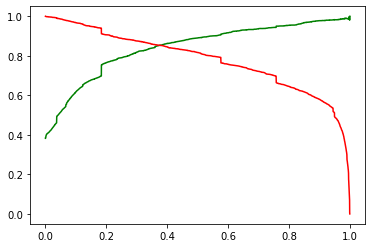

In [108]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**From the precision-recall curve, it appears that optimal threshold is 0.4**

In [109]:
y_train_pred_final['final_predicted_p_r'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_p_r
0,0,0.006694,641410,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.192645,597687,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.010044,626825,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.076322,587928,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.184255,622366,0,1,1,0,0,0,0,0,0,0,0,0,0


In [110]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_p_r))

0.8896103896103896


In [111]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_p_r )
confusion3

array([[3669,  333],
       [ 381, 2085]], dtype=int64)

In [112]:
func_metrics(confusion3)

,Metric,Value
0,accuracy,0.889610
1,sensitivity/Recall,0.845499
2,specificity,0.916792
3,FPR,0.083208
4,FNR,0.154501
5,Precision,0.862283
6,NPV,0.905926


In [113]:
# Comparing with values for sensitivity/specifity threshold 0.3
# Metric 	Value
# 0 	accuracy 	0.878324
# 1 	sensi/TPR/Recall/HitRate 	0.875101
# 2 	speci/TNR 	0.880310
# 3 	FPR 	0.119690
# 4 	FNR 	0.124899
# 5 	PositivePredictiveValue/Precision 	0.818354
# 6 	NegativePredictiveValue 	0.919603


**Comparing values for different metrics and requirement, we would need to identify most likely conversions i.e. higher sensitivity/recall values. Accordingly, optimal threshold found using sensitivity/specificity curve would be a better option with value 0.875101**

In [114]:
colFinal= list(X_train_rfe.columns)
colFinal

['const',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Specialization_Finance Management',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Others',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Others',
 'Lead Source_Olark Chat',
 'Last Notable Activity_Others',
 'Last Notable Activity_SMS Sent']

In [115]:
colFinal.pop(0)
colFinal

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Specialization_Finance Management',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Others',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Others',
 'Lead Source_Olark Chat',
 'Last Notable Activity_Others',
 'Last Notable Activity_SMS Sent']

### Step 9: Making predictions on the test set

In [116]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [117]:
X_test = X_test[colFinal]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization_Finance Management,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_Olark Chat Conversation,Last Activity_Others,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Olark Chat,Last Notable Activity_Others,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,
619003,1.749143,0.964504,2.117849,0,0,0,0,0,0,0,0,0,1
636884,-1.149699,-0.885371,-1.266675,0,0,1,0,0,0,1,0,0,1
590281,0.662077,-0.777416,1.553761,0,0,1,0,1,0,0,0,1,0
579892,-1.149699,-0.885371,-1.266675,0,0,0,1,0,0,0,1,0,0
617929,-1.149699,-0.885371,-1.266675,0,0,1,0,0,0,1,0,0,0


In [118]:
X_test_sm = sm.add_constant(X_test)

In [119]:
X_test_sm.shape

(2772, 14)

Making predictions on the test set

In [120]:
y_test_pred = res.predict(X_test_sm)

In [121]:
y_test_pred[:10]

Lead Number
619003    0.765825
636884    0.999303
590281    0.754440
579892    0.037309
617929    0.995814
579992    0.982798
643289    0.971147
581637    0.930317
588474    0.045669
609001    0.968827
dtype: float64

In [122]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [123]:
# Let's see the head
y_pred_1.head()

,0
Lead Number,
619003,0.765825
636884,0.999303
590281,0.754440
579892,0.037309
617929,0.995814


In [124]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
Lead Number,
619003,1
636884,1
590281,1
579892,0
617929,1


In [125]:
# Putting 'Lead Number' to index
y_test_df['Lead Number'] = y_test_df.index

In [126]:
y_test_df.head()

,Converted,Lead Number
Lead Number,,
619003,1,619003
636884,1,636884
590281,1,590281
579892,0,579892
617929,1,617929


In [127]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [128]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [129]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,619003,0.765825
1,1,636884,0.999303
2,1,590281,0.754440
3,0,579892,0.037309
4,1,617929,0.995814


In [130]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [131]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [132]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,619003,1,0.765825
1,636884,1,0.999303
2,590281,1,0.754440
3,579892,0,0.037309
4,617929,1,0.995814


In [133]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [134]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,619003,1,0.765825,1
1,636884,1,0.999303,1
2,590281,1,0.754440,1
3,579892,0,0.037309,0
4,617929,1,0.995814,1


In [135]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8744588744588745

In [136]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion4

array([[1466,  211],
       [ 137,  958]], dtype=int64)

In [137]:
func_metrics(confusion4)

,Metric,Value
0,accuracy,0.874459
1,sensitivity/Recall,0.874886
2,specificity,0.874180
3,FPR,0.125820
4,FNR,0.125114
5,Precision,0.819504
6,NPV,0.914535


In [138]:
# Comparing with train values for sensitivity/specifity threshold 0.3
# Metric 	Value
# 0 	accuracy 	0.878324
# 1 	sensi/TPR/Recall/HitRate 	0.875101
# 2 	speci/TNR 	0.880310
# 3 	FPR 	0.119690
# 4 	FNR 	0.124899
# 5 	PositivePredictiveValue/Precision 	0.818354
# 6 	NegativePredictiveValue 	0.919603

**As is observed, metrics for test and train models are very similar. Hence, model is able to predict quite well**

**As per the ask, we need to assign lead score to leads. This can be done by multiplying Converted_Prob value with 100. Adding a column to metrics y_pred_final dataframe to display Lead Score.**

In [139]:
y_pred_final['Lead Score'] = round(y_pred_final['Converted_Prob']*100,0)

In [140]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted,Lead Score
0,619003,1,0.765825,1,77.0
1,636884,1,0.999303,1,100.0
2,590281,1,0.754440,1,75.0
3,579892,0,0.037309,0,4.0
4,617929,1,0.995814,1,100.0


**Higher the Lead Score, greater the chance of conversion. Hence, while making calls, it is better to start with the highest lead scores.**